# IN-STK5000 project 1
# by: Espen H. Kristensen (espenhk), Cornelius Bencsik (corneb), Amir Basic (amirbas), Torstein Forseth (torfor)

### Import packages

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
import sklearn.neural_network
from sklearn import metrics
from collections import Counter as counter

%matplotlib inline

# Problem 1: Build a scenario
Our scenario is an exploratory data analysis to see whether a selection of easy to self-report features can be an indicator or predictor of diabetes. The business context is aiming to sell an Internet-based survey to schools to allow for simple screening at a large scale and recommend a certain portion of at-risk students be evaluated for diabetes.

We are mindful that our dataset skews towards a quite elderly group of patients, as well as the limitations given by a relatively low amount of overall data. Thus, our end goal must be to find some promising sets of features, and conclude that we wish to collect more data of this type from a more representative age group.

## Questions:
### What type of information does this data contain?

### Our features are:

#### Categorical (multi-valued)
* Gender
* Race
* Occupation
* GP

#### Categorical (binary: "yes"/"no")
* Obesity
* Polyphagia (excessive hunger)
* Genital Thrush
* Visual Blurring
* Itching
* Irritability
* Delayed Healing
* Partial Paresis (weakening of muscles)
* Muscle Stiffness
* Alopecia (hair loss)
* TCep
* Sudden Weight Loss
* Weakness

#### Continuous
* Height
* Weight
* Age
* Temperature
* Urination

#### Target variable
* Diabetes ("yes"/"no")

### Can this data be used to further research/to accelerate a business?
Yes - while there are certain limitations on the age group and amount of data (as mentioned above), we hope to find some promising correlations that can form the basis for further data collection and exploration. Given this second round, we would hope to have the grounds for developing an Internet-survey to sell to schools, that can screen students for diabetes. Screening the parents of potential at-risk students could also be a further means of supporting this analysis.

### Does the potential of the data justify the cost of collection?
As it could create a large public benefit to bring early diagnoses of diabetes, we believe the cost of collection is justified. Further, we seek to find correlations in features that are easily self-reported. This would lower the effort and economic costs of collecting further data. We are still mindful of the privacy and fairness-related cost of collecting data that are at their core sensitive, and that we need to take steps to mitigate this.

### Why would you use data-driven decision making in the chosen scenario?
The medical field is currently thoroughly familiar with the correlations in single or pairs of variables and their links to diabetes, but we find it probable that more complex correlations in larger sets of features - say, 3-5 - are as yet unexplored using traditional inspection of statistics (and other medical analysis). Thus we believe these forms of complex correlations can only be discovered using data-based methods, that scale well to analyzing many features at once.

### What kinds of concerns could the dataset rise?
Privacy is an important concern: all health data are by definition regarded as sensitive, and thus our entire dataset consists of only sensitive features. Our analysis needs to account for this. Another concern is biases in the dataset: for instance the patients skew towards an older age with many retirees. We also see that nearly every patient in the dataset is white, which is obviously an issue as there may be cases where this doesn't extrapolate to other races. The dataset also contains names of individual doctors, which may be a privacy concern to use. There may also be biases here, for instance a doctor may have a quite homogenous demographic as current patients recommend them to their friends and family. A nightmare example would be doing public advertisement of "this doctor is great at preventing diabetes", or even worse "avoid this doctor to prevent diabetes". There have even been examples of schools firing teachers based on this form of analysis, used incorrectly.

### What are potential privacy concerns and how could you mitigate them?
As mentioned, all health data is sensitive. We need to take steps to mitigate that, likely with a more sophisticated and robust approach like for instance *differential privacy*. This would prevent for instance linkage attacks, something for instance *k-anonymity* does not prevent. Further, the issue of using individual doctors as features is apparent. This could be mitigated by simply not using this feature in our analysis. As we wish to scale this to a general population level, this would regardless not be a feature that would be useful.

# Task 2: Data analysis & processing
## Initial data analysis

#### Read the data into a DataFrame

In [95]:
diabetes_df = pd.read_csv("data/diabetes.csv")
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 516 non-null    float64
 1   Gender              518 non-null    object 
 2   Race                518 non-null    object 
 3   Occupation          515 non-null    object 
 4   GP                  513 non-null    object 
 5   Height              513 non-null    float64
 6   Weight              514 non-null    float64
 7   Obesity             516 non-null    object 
 8   Temperature         520 non-null    float64
 9   Urination           513 non-null    float64
 10  TCep                520 non-null    object 
 11  Polydipsia          513 non-null    object 
 12  Sudden Weight Loss  514 non-null    object 
 13  Weakness            516 non-null    object 
 14  Polyphagia          516 non-null    object 
 15  Genital Thrush      515 non-null    object 
 16  Visual B

### How large is the dataset?
We have 520 entries (patients).

### What type of values do you have? (numerical, categorical)
See descriptions of data above, under problem 1.

### How much data is missing?
Overall, 0.87% of data is missing (single values). This is fairly evenly distributed across features, with each feature having from 0 to 7 missing values. Overall we have 95 individuals with at least one feature missing, with 13 individuals missing two or more features. The maximum is three fields missing for a single individual.

### How clean is the data? Does it look like it comes from multiple sources?
The data is overall fairly clean, but it is apparent (and explicitly defined in the instructions) that the data comes from multiple hospitals. This is clear from for instance the height column, where values have been input both in meters and centimeters. Furthermore, there are some outliers in each column (we will return to this). Values are also given either in shift case ("Yes"/"No") or lower case ("yes"/"no").

### Discuss any interesting findings, and perform data cleanup

#### Convert all categorical values to lowercase

In [96]:
categorical_cols = diabetes_df.describe(include='object').columns
for i in categorical_cols:
    diabetes_df[i] = diabetes_df[i].str.lower()

# Note that all our binary categorical features now have 2 unique values
diabetes_df.describe(include="object")

,Gender,Race,Occupation,GP,Obesity,TCep,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Diabetes
count,518,518,515,513,516,520,513,514,516,516,515,513,515,515,515,515,513,515,520
unique,2,3,7,20,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,male,white,retired,dr. lorelai york,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,positive
freq,328,510,139,35,438,306,283,300,303,282,400,284,262,390,277,291,321,339,320


Furthermore, we elect to remove the 13 individuals that have two or more features missing. We do this by simply erasing these values.

In [97]:
# List those with more than 1 missing value

na_rows = list(diabetes_df.loc[diabetes_df.isnull().sum(1)>1].index)
print("index of individuals with 2 or more nan-values: ", na_rows)

print("\n")
print("number of individuals before dropping those with 2 or more nan-values: ",len(diabetes_df))
# Drop these rows, and confirm we now have 520 - 13 = 507 rows
diabetes_df = diabetes_df.drop(na_rows)
print("number of individuals after dropping those with 2 or more nan-values: ",len(diabetes_df))

index of individuals with 2 or more nan-values:  [20, 40, 58, 120, 147, 165, 275, 277, 363, 385, 412, 431, 463]


number of individuals before dropping those with 2 or more nan-values:  520
number of individuals after dropping those with 2 or more nan-values:  507


In [98]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 0 to 519
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 504 non-null    float64
 1   Gender              505 non-null    object 
 2   Race                506 non-null    object 
 3   Occupation          503 non-null    object 
 4   GP                  500 non-null    object 
 5   Height              501 non-null    float64
 6   Weight              503 non-null    float64
 7   Obesity             505 non-null    object 
 8   Temperature         507 non-null    float64
 9   Urination           500 non-null    float64
 10  TCep                507 non-null    object 
 11  Polydipsia          504 non-null    object 
 12  Sudden Weight Loss  503 non-null    object 
 13  Weakness            504 non-null    object 
 14  Polyphagia          504 non-null    object 
 15  Genital Thrush      502 non-null    object 
 16  Visual B

## Outliers:

### 1. Analyse the outliers in your data
First, we list mean, median, min and max values:

In [99]:
empty_row = ["", "", ""]
empty_index = " "

columns = ["Mean(SD)", "Median", "Min to Max"]
index = ["\033" + "Continuous:", empty_index]
data = [empty_row, empty_row]

for i in diabetes_df.describe(include = "float64"):
    data.append([str(float("{:.2f}".format(diabetes_df[i].mean()))) + " (" + str(float("{:.2f}".format(diabetes_df[i].std())))
                 + ")", str(float("{:.2f}".format(diabetes_df[i].median()))),
                 str(float("{:.2f}".format(diabetes_df[i].min()))) + " - " + str(diabetes_df[i].max())])
    index.append(i)
    
new_frame_float64 = pd.DataFrame(data, index, columns)

empty_row = ["", "", ""]
empty_index = " "

columns = ["Mean(SD)", "Median", "Min to Max"]
index = [empty_index, empty_index, "Categorical:", empty_index, empty_index]
data = [empty_row, empty_row, ["\033" + "Undergroup", "\033" + "N", ""], empty_row, empty_row]


for i in diabetes_df.describe(include = "object"):
    list_count = counter(diabetes_df[i])
    count = 0

    for j in list_count:
        if count > 0:
            index.append(" ")
        else:
            index.append(i)
            count += 1

        data.append([j, list_count[j], " "])

new_frame_object = pd.DataFrame(data, index, columns)

frames = [new_frame_float64, new_frame_object]

# result = pd.concat(frames)
# printable = result.style.format()
#note: couldn't get display(printable) to work, so changed to this
#print(result)

We create a boxplot of our numerical values:

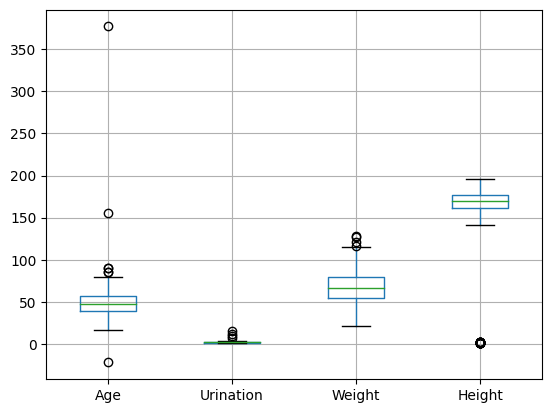

In [100]:
boxplot = diabetes_df.boxplot(column=["Age", "Urination", "Weight", "Height"])

Since urination has a vastly different scale, we plot this separately:

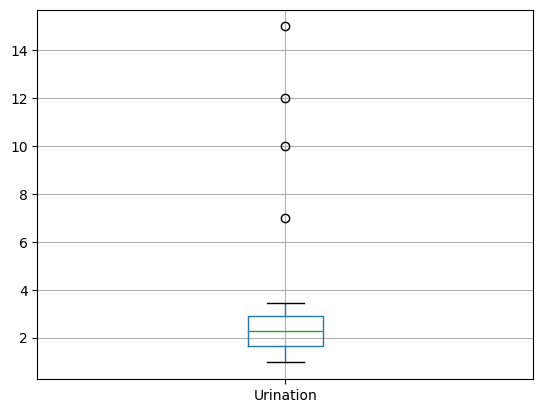

In [101]:
# noinspection PyRedeclaration
boxplot = diabetes_df.boxplot(column=["Urination"])

Here, we see some clear outliers that we wish to remove or adjust.

#### Age column:
We see 3 absurd values: -22, 155 and 377. We see no reliable explanation for this: you could imagine that -22 is a typo and the other two are given in months, but both these conclusions seem speculative. We elect to remove these 3 individuals.

We also see 3 individuals with missing values

In [102]:
# We want to keep these
print(diabetes_df[(diabetes_df['Age'] <= 110) & (diabetes_df['Age'] >= 0) | diabetes_df['Age'].isnull()])
# We want to discard these
print(diabetes_df[(diabetes_df['Age'] > 110) | (diabetes_df['Age'] < 0)])


      Age  Gender   Race Occupation                   GP    Height  Weight  \
0    40.0    male  white   engineer      dr. ingrid mata  179.2800  101.94   
1    58.0    male  white    retired  dr. andreea gregory  175.9400   66.80   
2    41.0    male  white   engineer    dr. mayson harris  175.9300   87.25   
3    45.0    male  white    manager     dr. arda o'brien    1.7554   74.63   
4    60.0    male  white     driver      dr. ingrid mata  167.7900   91.97   
..    ...     ...    ...        ...                  ...       ...     ...   
515  39.0  female  white    cashier    dr. orla arellano  168.1100   74.92   
516  48.0  female  white   engineer  dr. andreea gregory  169.2700   50.81   
517  58.0  female  white    retired     dr. arda o'brien  162.5200   79.72   
518  32.0  female  white    cashier    dr. mayson harris  157.7600   59.97   
519  42.0    male  white   engineer     dr. joshua riley  166.4600   64.89   

    Obesity  Temperature  Urination  ... Polyphagia Genital Thr

In [103]:
print("number of individuals before dropping those with age mistakes: ",len(diabetes_df))
diabetes_df = diabetes_df[(diabetes_df['Age'] <= 110) & (diabetes_df['Age'] >= 0) | diabetes_df['Age'].isnull()]
print("number of individuals after dropping those with age mistakes: ",len(diabetes_df))

number of individuals before dropping those with age mistakes:  507
number of individuals after dropping those with age mistakes:  504


#### Height column:
It's clear from the data -- and given in the data summary -- that these data are entered as both meters and centimeters. We see no values between 2 and 130, which supports this. Thus, we adjust the values below 2 from meters to centimeters by multiplying by 100:

Strange values (from 2 to 130):  0


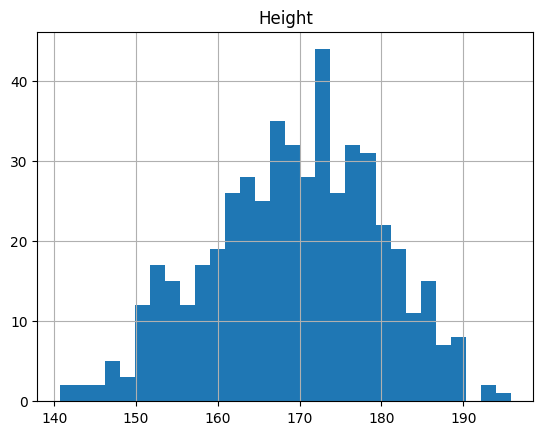

In [104]:
# Check that there are no strange values
print("Strange values (from 2 to 130): ", diabetes_df["Height"][(diabetes_df["Height"]<130) & (diabetes_df["Height"]>2)].count())

# Scale all the values given in meters:
diabetes_df.loc[diabetes_df['Height'] < 2, "Height"] = diabetes_df['Height'] * 100

# And plot to confirm
hist = diabetes_df.hist(column=["Height"], bins = 30)

### Urination column:

We see a handful of outliers, values above 7. This could potentially be given in deciliters, but we don't feel safe in assuming this, and thus we elect to remove these rows.

In [105]:
# list outliers
diabetes_df["Urination"][diabetes_df["Urination"]>4]

91     15.0
132    12.0
221     7.0
310    10.0
Name: Urination, dtype: float64

number of individuals before dropping those with urination above 4:  504
number of individuals after dropping those with urination above 4:  500


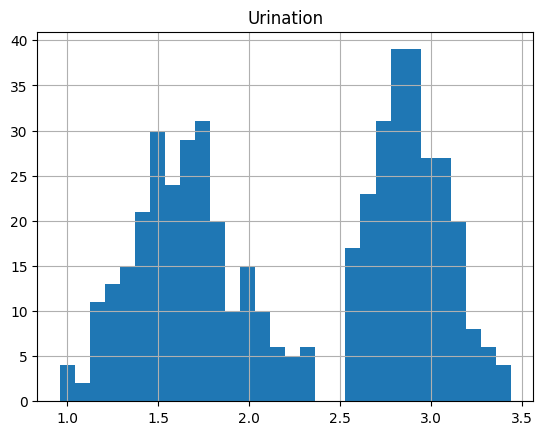

In [106]:
print("number of individuals before dropping those with urination above 4: ", len(diabetes_df))
# remove all outliers
diabetes_df = diabetes_df[(diabetes_df['Urination'] < 4) | diabetes_df['Urination'].isnull()]
print("number of individuals after dropping those with urination above 4: ",len(diabetes_df))

# and plot to confirm
# noinspection PyRedeclaration
hist = diabetes_df.hist(column=["Urination"], bins = 30)

We note that these data seem to be a bi-distribution. We quickly investigate the link between these two parts of the data, and our target variable:

In [107]:
diabetes_df_high_urination = diabetes_df[diabetes_df["Urination"]>2.45]
high_uri_diabetes_pos = len(diabetes_df_high_urination[(diabetes_df_high_urination["Diabetes"] == "positive")].value_counts(normalize=True))
high_uri = len(diabetes_df_high_urination)
print("Ratio, high urination: %d / %d = %.3f" % (high_uri_diabetes_pos, high_uri, (high_uri_diabetes_pos / high_uri)))

diabetes_df_low_urination = diabetes_df[diabetes_df["Urination"]<=2.45]
low_uri_diabetes_pos = len(diabetes_df_low_urination[(diabetes_df_low_urination["Diabetes"] == "positive")].value_counts(normalize=True))
low_uri = len(diabetes_df_low_urination)
print("Ratio, high urination: %d / %d = %.3f" % (low_uri_diabetes_pos, low_uri, (low_uri_diabetes_pos / low_uri)))



Ratio, high urination: 195 / 241 = 0.809
Ratio, high urination: 65 / 252 = 0.258


There seems to be a significant difference here. We note this as a potential feature to construct as a binary feature ("Did you pee more than X times today?"), which would be easy to collect for our purposes.

#### Weight column

The only troublesome values here are the lower end. The max value is 128 kg, which is a perfectly plausible weight for an adult male. The lower end has some extreme values, though: we see 23 individuals below 40kg, and 7 below 35kg.


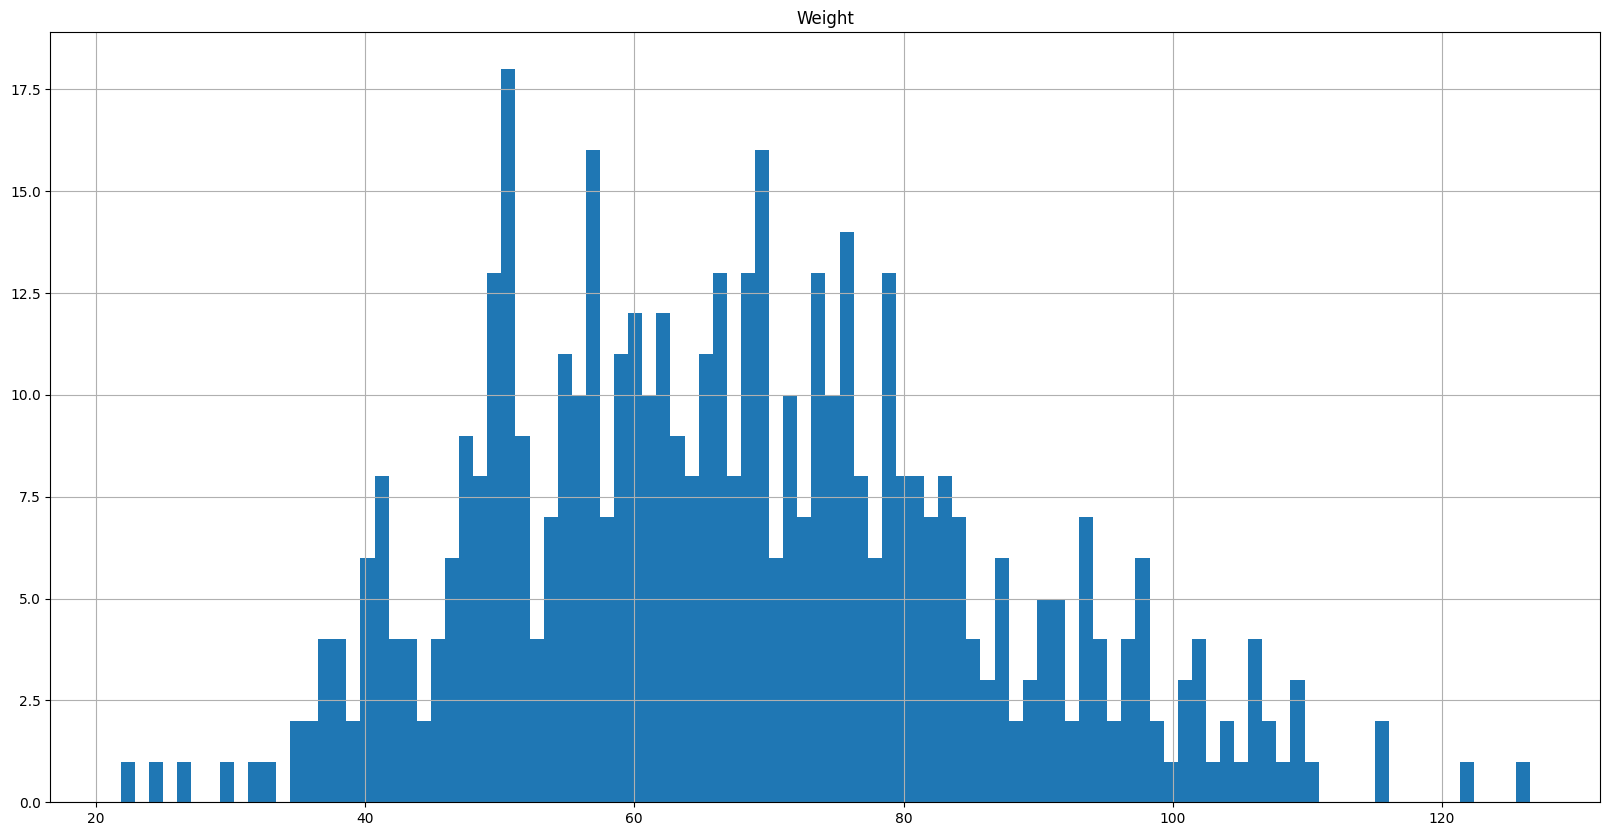

In [108]:
# Plot histogram of weight distribution
# noinspection PyRedeclaration
hist = diabetes_df.hist(column=["Weight"], figsize=(20,10), bins = 100)

In [109]:
diabetes_df.query('Weight < 35')

,Age,Gender,Race,Occupation,GP,Height,Weight,Obesity,Temperature,Urination,...,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Diabetes
50,36.0,female,white,cashier,dr. khalid sellers,167.01,33.19,no,37.05,3.13,...,yes,no,yes,no,yes,yes,yes,yes,no,positive
60,65.0,female,white,retired,dr. angharad grainger,164.27,31.72,no,37.09,2.82,...,yes,no,no,yes,no,no,yes,yes,no,positive
112,68.0,female,white,retired,dr. khalid sellers,167.75,26.18,no,36.95,3.02,...,yes,yes,yes,no,yes,yes,no,yes,NaN,positive
162,35.0,female,white,server,dr. nial higgs,154.32,29.55,no,37.04,1.80,...,no,no,no,no,no,no,no,no,no,positive
356,43.0,male,white,server,dr. nial higgs,168.11,24.98,no,37.05,1.67,...,no,yes,no,no,no,yes,no,no,yes,negative
420,47.0,female,white,engineer,dr. lina beech,148.82,34.99,no,36.88,1.69,...,yes,no,no,no,no,no,no,yes,no,positive
446,50.0,female,white,cashier,dr. kameron lancaster,149.52,21.88,no,37.17,3.11,...,yes,no,no,no,no,yes,yes,no,no,positive


<AxesSubplot: xlabel='Weight', ylabel='Height'>

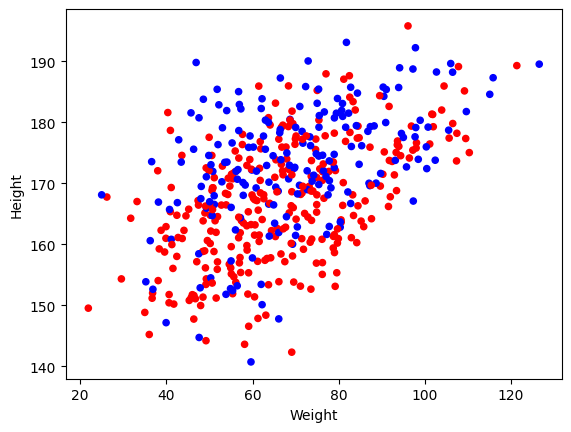

In [110]:
diabetes_df.plot.scatter("Weight", 'Height', c = ['r' if t == "positive" else 'b' for t in diabetes_df.Diabetes])

We add a column for BMI, to give a better measure than visual inspection. We note that BMI is not the best measure in well-trained individuals, but this is an issue for higher BMI values and not the lower ones.

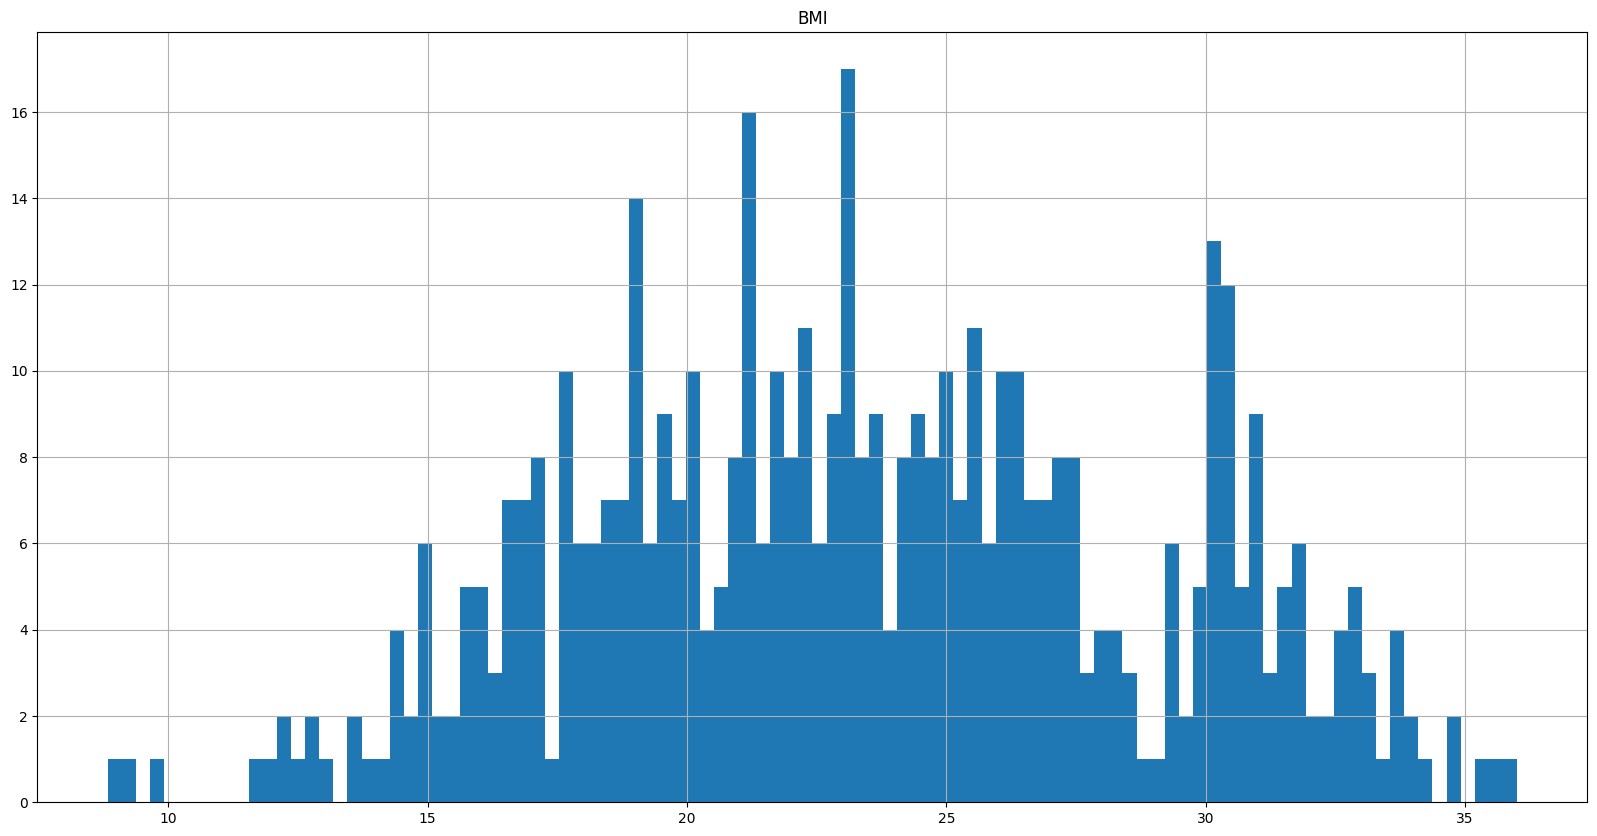

In [111]:
diabetes_df["BMI"] = diabetes_df["Weight"] / ((diabetes_df["Height"]/100)**2)
#diabetes_df["BMI"]
# noinspection PyRedeclaration
hist = diabetes_df.hist(column=["BMI"], figsize=(20,10), bins = 100)

In [112]:
diabetes_df.query("BMI < 15")

,Age,Gender,Race,Occupation,GP,Height,Weight,Obesity,Temperature,Urination,...,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Diabetes,BMI
30,57.0,male,white,retired,dr. alice watson,181.61,40.33,no,36.74,3.05,...,no,yes,no,no,no,yes,no,no,positive,12.227811
50,36.0,female,white,cashier,dr. khalid sellers,167.01,33.19,no,37.05,3.13,...,no,yes,no,yes,yes,yes,yes,no,positive,11.899324
60,65.0,female,white,retired,dr. angharad grainger,164.27,31.72,no,37.09,2.82,...,no,no,yes,no,no,yes,yes,no,positive,11.754838
112,68.0,female,white,retired,dr. khalid sellers,167.75,26.18,no,36.95,3.02,...,yes,yes,no,yes,yes,no,yes,NaN,positive,9.303462
119,34.0,female,white,engineer,dr. alice watson,165.35,40.91,no,37.33,3.08,...,no,no,no,yes,no,no,yes,no,positive,14.963083
131,43.0,male,white,engineer,dr. lorelai york,174.58,43.59,no,37.17,3.28,...,no,no,no,yes,no,no,yes,no,positive,14.302037
162,35.0,female,white,server,dr. nial higgs,154.32,29.55,no,37.04,1.80,...,no,no,no,no,no,no,no,no,positive,12.408322
166,57.0,male,white,cashier,dr. arda o'brien,169.31,41.12,no,37.52,2.84,...,no,yes,no,no,no,yes,no,no,positive,14.344582
218,30.0,male,white,manager,dr. albie colon,183.79,48.58,no,36.60,1.96,...,no,no,no,no,no,no,no,no,negative,14.381817
224,68.0,male,white,retired,dr. arda o'brien,173.48,43.44,no,37.01,1.69,...,no,yes,yes,no,yes,no,no,yes,negative,14.434143


[NHI](https://nhi.no/skjema-og-kalkulatorer/kalkulatorer/diverse/bmi-kalkulator-kroppsmasseindeks/) lists a BMI <= 16 as underweight degree 3 (their most extreme), and so we believe that anything below a BMI of 15 is implausible and likely a person who is no longer alive. Such extreme observations could skew our data, so we elect to remove these 24 individuals.

In [113]:
print("number of individuals before dropping those with BMI below or equal to 15: ", len(diabetes_df))
diabetes_df = diabetes_df[(diabetes_df['BMI'] >= 15) | diabetes_df['BMI'].isnull()]
print("number of individuals after dropping those with BMI below or equal to 15: ", len(diabetes_df))
diabetes_df.describe()

number of individuals before dropping those with BMI below or equal to 15:  500
number of individuals after dropping those with BMI below or equal to 15:  476


,Age,Height,Weight,Temperature,Urination,BMI
count,473.000000,470.000000,472.000000,476.000000,469.000000,466.000000
mean,47.964059,169.233723,69.201631,36.998298,2.261258,24.014137
std,12.103928,10.378282,17.155781,0.208501,0.671481,4.953646
min,16.000000,140.700000,34.990000,36.470000,0.960000,15.023426
25%,39.000000,161.937500,56.162500,36.860000,1.640000,20.015635
50%,47.000000,169.905000,67.895000,36.995000,2.290000,23.504093
75%,57.000000,176.870000,79.577500,37.140000,2.870000,27.409188
max,90.000000,195.820000,126.530000,37.570000,3.440000,35.999868


## Missing data:
### Race:
The race column is a case of somewhat missing data, as there is only a few individuals that are not white. While we see no direct reason race should have a direct link to diabetes, to reduce complexity we consider these individuals outliers and remove them. **We note that in future studies, an effort should be made to get a more diverse demographic, to prove or rule out such a link.**

In [114]:
print("number of individuals that are not white = ", len(diabetes_df[(diabetes_df["Race"] != "white")]))
print("number of individuals before dropping non-white rows: ", len(diabetes_df))
diabetes_df = diabetes_df[(diabetes_df["Race"] == "white")]
diabetes_df.drop(columns=["Race"], axis=1, inplace=True)
print("number of individuals after dropping non-white rows: ", len(diabetes_df))
diabetes_df.describe(include="all")

number of individuals that are not white =  8
number of individuals before dropping non-white rows:  476
number of individuals after dropping non-white rows:  468


,Age,Gender,Occupation,GP,Height,Weight,Obesity,Temperature,Urination,TCep,...,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Diabetes,BMI
count,465.000000,466,466,461,462.000000,464.000000,467,468.000000,461.000000,468,...,464,464,464,465,466,464,463,466,468,458.000000
unique,NaN,2,7,20,NaN,NaN,2,NaN,NaN,2,...,2,2,2,2,2,2,2,2,2,NaN
top,NaN,male,retired,dr. lorelai york,NaN,NaN,no,NaN,NaN,no,...,no,no,no,no,no,no,no,no,positive,NaN
freq,NaN,293,124,32,NaN,NaN,395,NaN,NaN,283,...,359,256,234,354,251,258,293,305,292,NaN
mean,48.030108,NaN,NaN,NaN,169.302381,69.230927,NaN,36.997778,2.269544,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.004288
std,12.153435,NaN,NaN,NaN,10.184845,17.111345,NaN,0.208792,0.671928,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.953578
min,16.000000,NaN,NaN,NaN,142.300000,34.990000,NaN,36.470000,0.960000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.023426
25%,39.000000,NaN,NaN,NaN,162.012500,56.090000,NaN,36.860000,1.640000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.015635
50%,47.000000,NaN,NaN,NaN,169.905000,68.135000,NaN,36.995000,2.360000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.467955
75%,57.000000,NaN,NaN,NaN,176.792500,79.577500,NaN,37.140000,2.880000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.385583


In [115]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 519
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 465 non-null    float64
 1   Gender              466 non-null    object 
 2   Occupation          466 non-null    object 
 3   GP                  461 non-null    object 
 4   Height              462 non-null    float64
 5   Weight              464 non-null    float64
 6   Obesity             467 non-null    object 
 7   Temperature         468 non-null    float64
 8   Urination           461 non-null    float64
 9   TCep                468 non-null    object 
 10  Polydipsia          466 non-null    object 
 11  Sudden Weight Loss  465 non-null    object 
 12  Weakness            465 non-null    object 
 13  Polyphagia          465 non-null    object 
 14  Genital Thrush      464 non-null    object 
 15  Visual Blurring     464 non-null    object 
 16  Itching 

## Categorical, binary
### Obesity
We know that there is a link between height, weight and obesity. Therefore, we wish to substitute missing values in this column based on these two proxies.

<AxesSubplot: xlabel='Weight', ylabel='Height'>

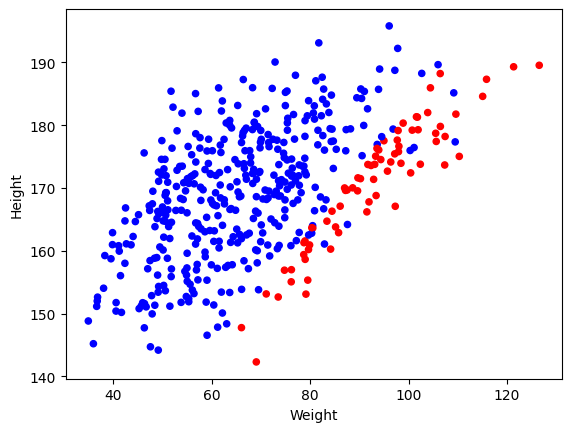

In [116]:
diabetes_df.plot.scatter("Weight", 'Height', c = ['r' if t == "yes" else 'b' for t in diabetes_df.Obesity])

,Age,Height,Weight,Temperature,Urination,BMI,Obesity_yes
count,465.000000,462.000000,464.000000,468.000000,461.000000,458.000000,468.000000
mean,48.030108,169.302381,69.230927,36.997778,2.269544,24.004288,0.153846
std,12.153435,10.184845,17.111345,0.208792,0.671928,4.953578,0.361187
min,16.000000,142.300000,34.990000,36.470000,0.960000,15.023426,0.000000
25%,39.000000,162.012500,56.090000,36.860000,1.640000,20.015635,0.000000
50%,47.000000,169.905000,68.135000,36.995000,2.360000,23.467955,0.000000
75%,57.000000,176.792500,79.577500,37.140000,2.880000,27.385583,0.000000
max,90.000000,195.820000,126.530000,37.570000,3.440000,35.999868,1.000000


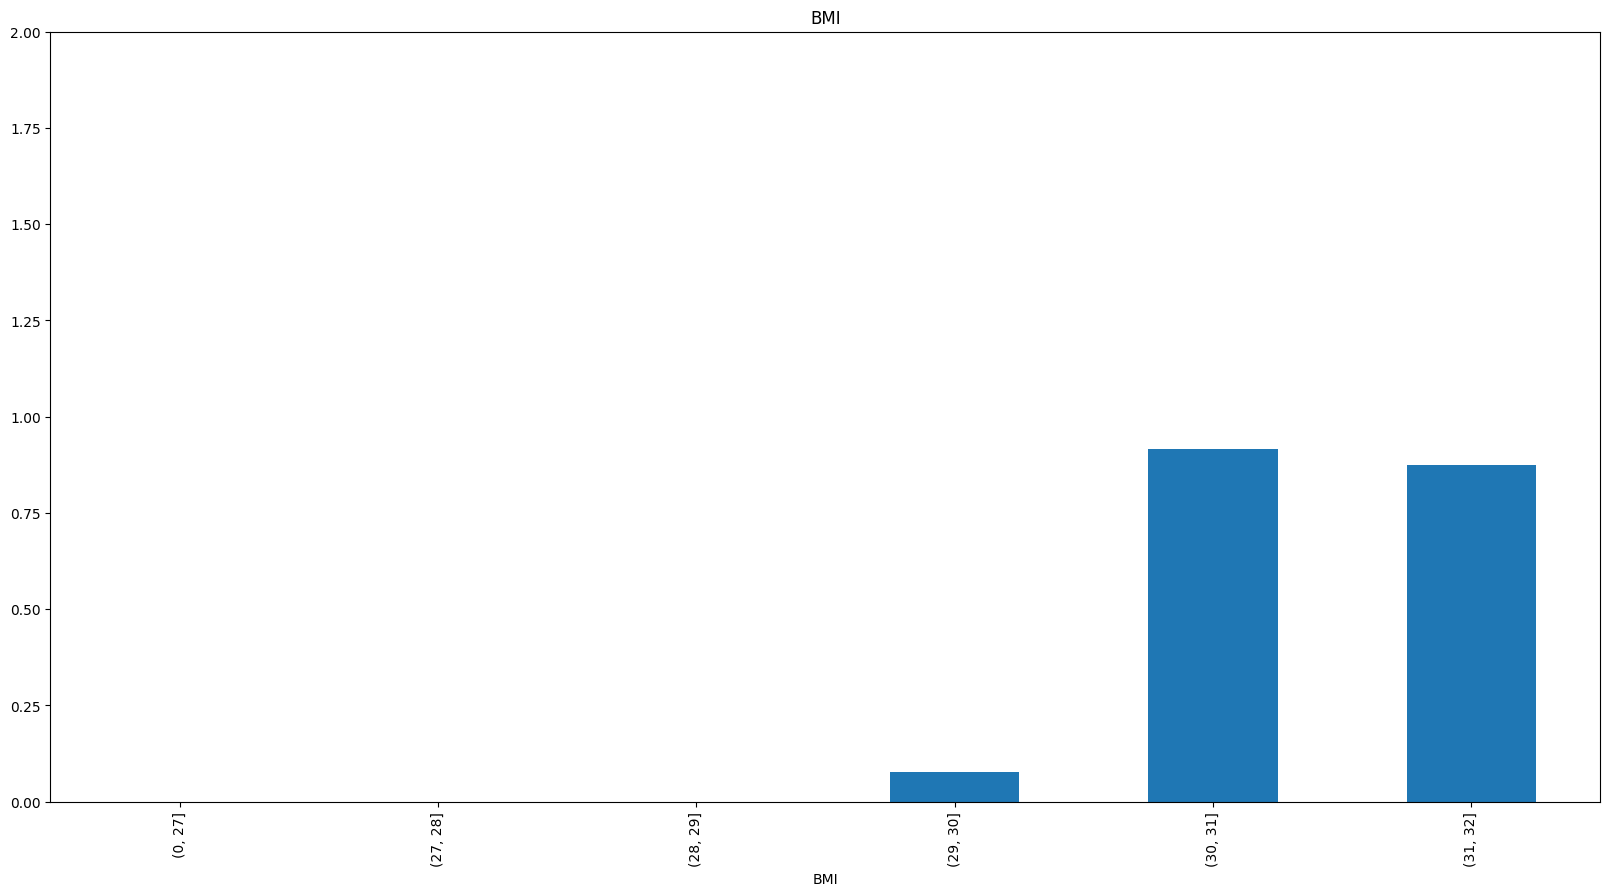

In [117]:
# noinspection PyRedeclaration
hist = diabetes_df.hist(column=["BMI"], figsize=(20,10), bins = 100)
one_hot = pd.get_dummies(diabetes_df["Obesity"], drop_first=True)
diabetes_df = pd.concat([diabetes_df, one_hot], axis=1)
diabetes_df.rename(columns={'yes': 'Obesity_yes'}, inplace=True)

diabetes_df.groupby(pd.cut(diabetes_df['BMI'],[0,27, 28, 29, 30, 31,32]))["Obesity_yes"].mean().plot.bar()
plot.ylim(0,2)
diabetes_df.describe()
#diabetes_df.groupby([pd.cut(diabetes_df['BMI'], [0,27, 28, 29,40]), "Obesity_yes"]).size().reset_index(name='count')

From this, it seems obvious that any individual with a BMI above 30 will be classified as obese with a very high, near certain, likelihood. Thus, we use this as our cutoff to fill in missing values:

In [118]:
counts = counter(diabetes_df["Obesity"].isna())
print(counts)
print("number of individuals with nan in obesity: ", counts[True])
print(diabetes_df[diabetes_df['Obesity'].isna() == True])
diabetes_df.Obesity.describe()


Counter({False: 467, True: 1})
number of individuals with nan in obesity:  1
      Age  Gender Occupation                 GP  Height  Weight Obesity  \
518  32.0  female    cashier  dr. mayson harris  157.76   59.97     NaN   

     Temperature  Urination TCep  ... Visual Blurring Itching Irritability  \
518        37.23       1.72  yes  ...             yes     yes           no   

    Delayed Healing Partial Paresis Muscle Stiffness Alopecia  Diabetes  \
518             yes              no               no      yes  negative   

           BMI Obesity_yes  
518  24.095739           0  

[1 rows x 25 columns]


count     467
unique      2
top        no
freq      395
Name: Obesity, dtype: object

In [119]:
# Fill inn missing values
diabetes_df['Obesity'] = np.where((diabetes_df["BMI"] >= 30) & (diabetes_df['Obesity'].isna() == True), "yes", diabetes_df['Obesity'])
diabetes_df['Obesity'] = np.where((diabetes_df["BMI"] < 30) & (diabetes_df['Obesity'].isna() == True), "no", diabetes_df['Obesity'])
diabetes_df.drop(columns=["Obesity_yes"], axis=1, inplace=True)
diabetes_df["Obesity"].describe()

count     468
unique      2
top        no
freq      396
Name: Obesity, dtype: object

## Filling in non-values:

We have decided to remove the rows with missing values in the following categories:
- Age
- Gender
- Height
- Weight
- GP
- Occupation

Even though there exist some method to predict age based on height and weight, height based on age and weight, and weight based on height and age, (occupation based on age and vica versa in specific cases such as age/retired, etc.) we believe the reward for implementing such methods dont surpass the cost of the implementation.

In [120]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 519
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 465 non-null    float64
 1   Gender              466 non-null    object 
 2   Occupation          466 non-null    object 
 3   GP                  461 non-null    object 
 4   Height              462 non-null    float64
 5   Weight              464 non-null    float64
 6   Obesity             468 non-null    object 
 7   Temperature         468 non-null    float64
 8   Urination           461 non-null    float64
 9   TCep                468 non-null    object 
 10  Polydipsia          466 non-null    object 
 11  Sudden Weight Loss  465 non-null    object 
 12  Weakness            465 non-null    object 
 13  Polyphagia          465 non-null    object 
 14  Genital Thrush      464 non-null    object 
 15  Visual Blurring     464 non-null    object 
 16  Itching 

In [121]:
print("number of individuals before dropping rows with nan-values in the categories: ",len(diabetes_df))

diabetes_df.dropna(subset = ["Age", "Gender", "Height", "Weight", "GP", "Occupation"], inplace=True)

print("number of individuals after dropping rows with nan-values in the categories: ", len(diabetes_df))


number of individuals before dropping rows with nan-values in the categories:  468
number of individuals after dropping rows with nan-values in the categories:  444


We autofill missing values based on random drawing from the distribution of frequency on existing values in that category.


In [122]:
def fill_na_df(a):
  # at this point, all other columns are dealt with
  nan_columns = a.columns[a.isnull().any()]
  for col in nan_columns:
    # rate of yes vs no's
    value_ratios = a[col].value_counts(normalize=True)
    missing = a[col].isnull() # rows with a missing value
    # pick randomly, weighted by ratio
    a.loc[missing,col] = np.random.choice(value_ratios.index, size=len(a[missing]),p=value_ratios.values)

  return a

In [123]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 519
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 444 non-null    float64
 1   Gender              444 non-null    object 
 2   Occupation          444 non-null    object 
 3   GP                  444 non-null    object 
 4   Height              444 non-null    float64
 5   Weight              444 non-null    float64
 6   Obesity             444 non-null    object 
 7   Temperature         444 non-null    float64
 8   Urination           437 non-null    float64
 9   TCep                444 non-null    object 
 10  Polydipsia          442 non-null    object 
 11  Sudden Weight Loss  441 non-null    object 
 12  Weakness            441 non-null    object 
 13  Polyphagia          441 non-null    object 
 14  Genital Thrush      440 non-null    object 
 15  Visual Blurring     440 non-null    object 
 16  Itching 

In [124]:
diabetes_df = fill_na_df(diabetes_df)
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 519
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 444 non-null    float64
 1   Gender              444 non-null    object 
 2   Occupation          444 non-null    object 
 3   GP                  444 non-null    object 
 4   Height              444 non-null    float64
 5   Weight              444 non-null    float64
 6   Obesity             444 non-null    object 
 7   Temperature         444 non-null    float64
 8   Urination           444 non-null    float64
 9   TCep                444 non-null    object 
 10  Polydipsia          444 non-null    object 
 11  Sudden Weight Loss  444 non-null    object 
 12  Weakness            444 non-null    object 
 13  Polyphagia          444 non-null    object 
 14  Genital Thrush      444 non-null    object 
 15  Visual Blurring     444 non-null    object 
 16  Itching 

## Create one-hot encoded columns for categorical variables:


In [125]:
not_onehot_cols = ['Age', 'Height', 'Weight', 'Temperature', 'Urination', 'GP', 'Occupation']
# noinspection SpellCheckingInspection
categoricals = diabetes_df.drop(not_onehot_cols, axis=1)
one_hot = pd.get_dummies(categoricals, drop_first=True)
one_hot.head(5)

,BMI,Gender_male,Obesity_yes,TCep_yes,Polydipsia_yes,Sudden Weight Loss_yes,Weakness_yes,Polyphagia_yes,Genital Thrush_yes,Visual Blurring_yes,Itching_yes,Irritability_yes,Delayed Healing_yes,Partial Paresis_yes,Muscle Stiffness_yes,Alopecia_yes,Diabetes_positive
0,31.716185,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,21.579794,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1
2,28.189387,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1
3,24.219281,1,0,0,0,1,1,1,1,0,1,0,1,0,0,0,1
4,32.667360,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1


In [126]:
not_onehot_df = diabetes_df[not_onehot_cols]
not_onehot_df.describe(include="all")
diabetes_df = pd.concat([not_onehot_df, one_hot], axis=1)
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 519
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     444 non-null    float64
 1   Height                  444 non-null    float64
 2   Weight                  444 non-null    float64
 3   Temperature             444 non-null    float64
 4   Urination               444 non-null    float64
 5   GP                      444 non-null    object 
 6   Occupation              444 non-null    object 
 7   BMI                     444 non-null    float64
 8   Gender_male             444 non-null    uint8  
 9   Obesity_yes             444 non-null    uint8  
 10  TCep_yes                444 non-null    uint8  
 11  Polydipsia_yes          444 non-null    uint8  
 12  Sudden Weight Loss_yes  444 non-null    uint8  
 13  Weakness_yes            444 non-null    uint8  
 14  Polyphagia_yes          444 non-null    ui

In [127]:
#df_urination_high = diabetes_df[:]
df_urination_high = diabetes_df.copy()
df_urination_high["Urination_high"] = df_urination_high["Urination"].apply(lambda x: 1 if x >2.45 else 0)
df_urination_high = df_urination_high.drop("Urination", axis=1)

In [128]:
df_urination_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 519
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     444 non-null    float64
 1   Height                  444 non-null    float64
 2   Weight                  444 non-null    float64
 3   Temperature             444 non-null    float64
 4   GP                      444 non-null    object 
 5   Occupation              444 non-null    object 
 6   BMI                     444 non-null    float64
 7   Gender_male             444 non-null    uint8  
 8   Obesity_yes             444 non-null    uint8  
 9   TCep_yes                444 non-null    uint8  
 10  Polydipsia_yes          444 non-null    uint8  
 11  Sudden Weight Loss_yes  444 non-null    uint8  
 12  Weakness_yes            444 non-null    uint8  
 13  Polyphagia_yes          444 non-null    uint8  
 14  Genital Thrush_yes      444 non-null    ui

In [129]:
df_urination_high["Urination_high"].value_counts()

0    226
1    218
Name: Urination_high, dtype: int64

## Correlations - Feil antagelser? Vi baserte dette kun på Pearson's korrelasjon

We use the following "rule of thumb" thresholds to signify the strength of a correlation:

* 0.00-0.30: low
* 0.30-0.50: moderate
* 0.50-0.90: high
* 0.90-0.999: perfect

Source: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/

We fully ignore all the "low" correlations, as this would return literally all combinations. We also ignore correlations of a value with itself ($Corr(A,A) = 1$), and exclude permutations (keep $Corr(A, B)$ and discard $Corr(B, A)$).


Litt om Chi-square test, ANOVA og Kendall's:

### Categorical features vs categorical target: Chi-square test.  
Assumption(H0): The two columns are NOT related to each other. 

Result of Chi-Sq Test: The Probability of H0 being True (p-value)

### Numeric features vs categorical target: ANOVA or Kendall's.
ANOVA correlation coefficient (linear).
Kendall’s rank coefficient (nonlinear).
Kendall does assume that the categorical variable is ordinal

## Correlation
1. Analyse the correlations between features
2. Analyse the correlations between features and target (’Diabetes’)

Splitting features into numeric and categorical features separately

In [130]:
cat_variables = ["Partial Paresis_yes", "Urination_high", "Itching_yes", "Alopecia_yes", "Muscle Stiffness_yes",
                   "Polyphagia_yes", "Weakness_yes", "Visual Blurring_yes", "Sudden Weight Loss_yes", "Polydipsia_yes",
                   "Gender_male", "Obesity_yes", "TCep_yes", "Delayed Healing_yes", "Genital Thrush_yes",
                    "Irritability_yes"]
numeric_variables = ["BMI", "Temperature", "Weight", "Height", "Age"]

df = df_urination_high.copy()

X = df.drop("Diabetes_positive", axis=1)
y = df_urination_high["Diabetes_positive"]
X_cat = X[cat_variables]
X_numeric = X[numeric_variables]

### Correlation - Between features and target (’Diabetes’)

Function below runs a correlation hypothesis test between features and a target variable. 

In [131]:
from sklearn.feature_selection import SelectKBest

def corr_test(X,y,score_type,nr_features="all"):
  # define feature selection
  fs = SelectKBest(score_func=score_type, k=nr_features)
  # apply feature selection
  X_selected = fs.fit_transform(X, y)

  dict_values = dict()
  dict_values[score_type.__name__ +"-score"] = np.round(fs.scores_,1)
  dict_values["p-value"] = np.round(fs.pvalues_,4)

  return pd.DataFrame(data = dict_values, index = fs.feature_names_in_).sort_values(by = "p-value")

#### Correlation - Categorical features vs categorical target: Chi-square test
H₀ (Null Hypothesis) — that the 2 categorical variables being compared are independent of each other. Categorical feature vs categorical target.
H₁ (Alternate Hypothesis) — that the 2 categorical variables being compared are dependent on each other. Categorical feature vs categorical target.

In [132]:
from sklearn.feature_selection import chi2        # Categorical vs categorical

print(f'Categorical features vs categorical target \n\n {corr_test(X_cat,y,chi2)}')

Categorical features vs categorical target 

                         chi2-score  p-value
Partial Paresis_yes           50.8   0.0000
Urination_high                97.4   0.0000
Alopecia_yes                  18.5   0.0000
Polyphagia_yes                34.7   0.0000
Visual Blurring_yes           19.5   0.0000
Sudden Weight Loss_yes        45.6   0.0000
Polydipsia_yes                99.4   0.0000
Gender_male                   33.3   0.0000
TCep_yes                      71.3   0.0000
Irritability_yes              36.7   0.0000
Weakness_yes                  13.3   0.0003
Muscle Stiffness_yes           4.2   0.0413
Genital Thrush_yes             2.8   0.0960
Delayed Healing_yes            1.8   0.1773
Obesity_yes                    1.2   0.2676
Itching_yes                    0.1   0.8211


We decided to implement the chi2 test to compare the dependency between the categorical variables and target variable (Diabetes), because it is a sufficient to calculate the correlation between two categorical variables without ranks.

For 5 variables (Muscle Stiffness, Genital Thrush, Delayed Healing, Obesity & Itching), the p-values ia above 0.05, which indicates that we cannot say that they are correlated with the target variable (Diabetes).

We use these findings to conclude that they most likely are independent from the target variable, or that they dont have a significant impact on predicting diabetes.

#### Correlation - Numeric features vs categorical target: ANOVA f-test
H₀ (Null Hypothesis) — that the numeric variable is independent of the categorical target variable.  
H₁ (Alternate Hypothesis) — that the numeric variable is dependent on the categorical target variable.

In [133]:
from sklearn.feature_selection import f_classif   # Numeric vs categorical

print(f'Numeric features vs categorical target \n\n {corr_test(X_numeric,y,f_classif)}')

Numeric features vs categorical target 

              f_classif-score  p-value
Height                  42.9   0.0000
Age                      7.7   0.0058
Weight                   6.0   0.0143
Temperature              1.8   0.1783
BMI                      0.4   0.5290


We decided to implement the ANOVA f-test test to compare the dependency between the numerical variables and target variable (Diabetes), because it is sufficient for calculating correlation between numerical and categorical variables, without implying any assumptions such as linearity between the variables.

For 2 variables (Temperature & BMI), the p-values ia above 0.05, which indicates that we cannot say that they are correlated with the target variable (Diabetes).

We use these findings to conclude that they most likely are independent from the target variable, or that they dont have a significant impact on predicting diabetes.

### Correlation - Between features

#### Correlation between numeric features

<AxesSubplot: >

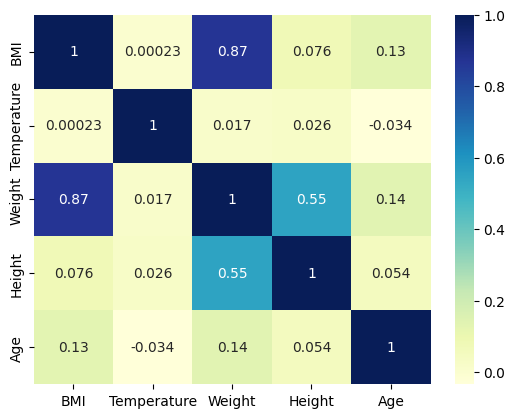

In [134]:
sns.heatmap(X_numeric.corr(), annot = True, cmap='YlGnBu')      # Pearson's correlation coefficient - Numeric vs Numeric

To see the relationship between the numerical variables/features, we picked the Pearson coefficient. It is sufficient when it comes to correlation between numerical variables.

There are two interesting cases with Pearson coefficient > 0.5, which implies a high correlation:
- Height & Weight
- BMI & Weight

These cases positive relationships implies that if we use both features in a predictive manner, they can double up on each other and we weight the value of a feature more than it should because that feature is also predictive in other variables. Simply put: Two variables that have a correlative relationship explain a lot of the same variation, which means we dont necessarily need both of the variables.

#### Correlation between numeric features and categorical features

In [135]:
for name in X_numeric:
    print("\n")
    print(name)
    frame = corr_test(X_cat, X_numeric[name], f_classif)
    print(frame[frame["p-value"] < 0.05])



BMI
Empty DataFrame
Columns: [f_classif-score, p-value]
Index: []


Temperature
                     f_classif-score  p-value
Visual Blurring_yes              1.5   0.0030
Polyphagia_yes                   1.3   0.0478


Weight
             f_classif-score  p-value
Obesity_yes              3.2   0.0133


Height
          f_classif-score  p-value
TCep_yes              2.7   0.0086


Age
                        f_classif-score  p-value
Partial Paresis_yes                 4.1   0.0000
Urination_high                      4.2   0.0000
Itching_yes                         2.8   0.0000
Alopecia_yes                        4.8   0.0000
Muscle Stiffness_yes                3.7   0.0000
Polyphagia_yes                      4.5   0.0000
Weakness_yes                        2.9   0.0000
Visual Blurring_yes                 3.9   0.0000
Sudden Weight Loss_yes              3.2   0.0000
Polydipsia_yes                      4.3   0.0000
Gender_male                         4.0   0.0000
Obesity_yes           

C:\Users\espen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


Using the ANOVA f-test to test dependency between numerical and categorical features suggests that Age is dependent with multiple (the majority) of the categorical variables.

#### Correlation between categorical features

In [136]:
for name in X_cat:
    print("\n")
    print(name)
    frame = corr_test(X_cat, X_cat[name], chi2)
    print(frame[frame["p-value"] < 0.05])
    



Partial Paresis_yes
                        chi2-score  p-value
Partial Paresis_yes          248.0   0.0000
Urination_high                40.7   0.0000
Polyphagia_yes                35.1   0.0000
Visual Blurring_yes           26.0   0.0000
Polydipsia_yes                44.4   0.0000
Gender_male                   18.2   0.0000
TCep_yes                      17.7   0.0000
Muscle Stiffness_yes          15.0   0.0001
Sudden Weight Loss_yes        14.5   0.0001
Alopecia_yes                  13.8   0.0002
Irritability_yes              14.2   0.0002
Weakness_yes                  12.9   0.0003
Delayed Healing_yes           12.9   0.0003
Genital Thrush_yes            11.4   0.0007


Urination_high
                        chi2-score  p-value
Partial Paresis_yes           44.6   0.0000
Urination_high               226.0   0.0000
Polyphagia_yes                33.0   0.0000
Sudden Weight Loss_yes        47.0   0.0000
Polydipsia_yes                80.1   0.0000
TCep_yes                      31.8   

<AxesSubplot: xlabel='Weight', ylabel='BMI'>

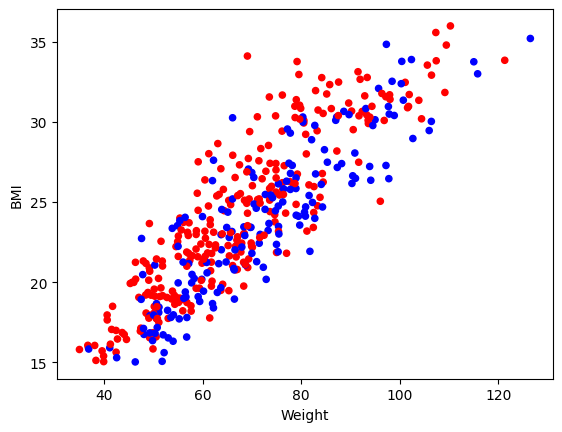

In [137]:
df.plot.scatter("Weight", 'BMI', c = ['r' if t == 1 else 'b' for t in diabetes_df["Diabetes_positive"]])

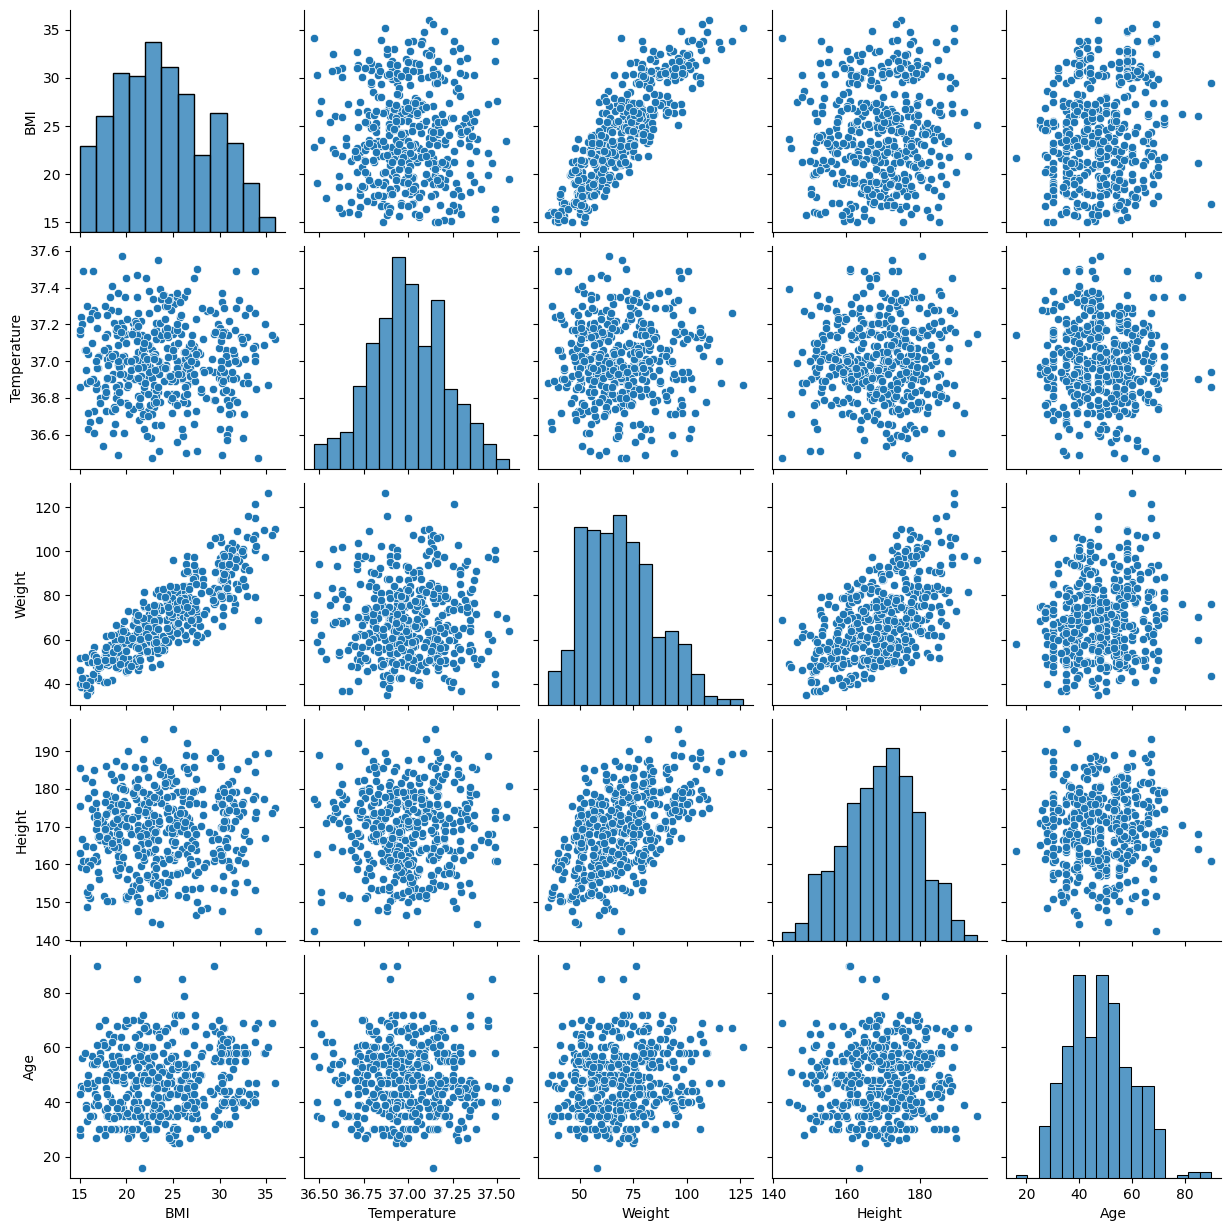

In [138]:
sns.pairplot(data=df[numeric_variables])

See from the pairplot that there's some correlation between:  
Weight and BMI
Height and Weight

As was evident from the Pearson's coefficient test.


#### Numerical vs categorical features

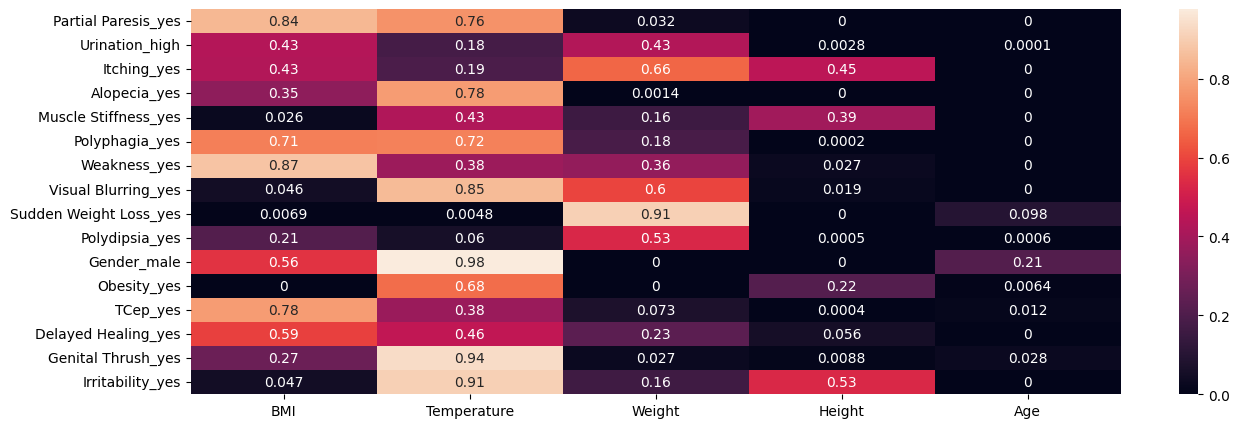

In [139]:
corr_numcat = pd.DataFrame(columns = numeric_variables, index = cat_variables)

for name in cat_variables:
    frame = corr_test(X_numeric, X_cat[name], f_classif)
    corr_numcat.loc[name] = frame["p-value"]

corr_numcat = corr_numcat[corr_numcat.columns].astype(float)
fig, ax = plot.subplots(figsize=(15,5))
sns.heatmap(corr_numcat, annot = True, ax = ax)
None

#### Categorical vs categorical features

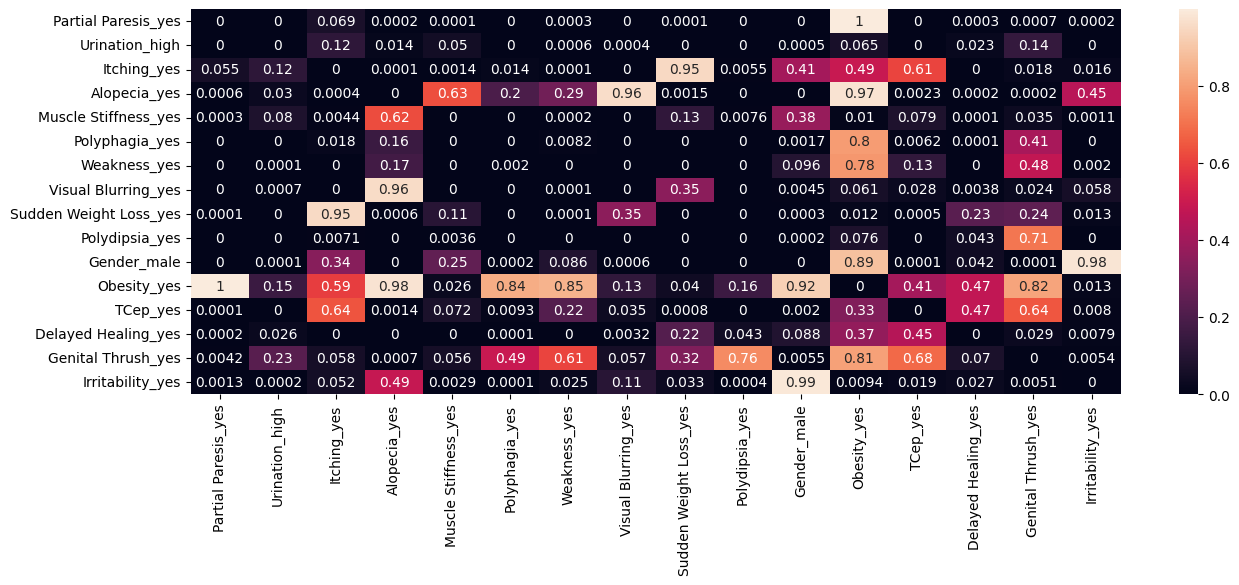

In [140]:
corr_cat = pd.DataFrame(columns = cat_variables, index = cat_variables)
for name in X_cat:
    frame = corr_test(X_cat, X_cat[name], chi2)
    corr_cat.loc[name] = frame["p-value"]

corr_cat = corr_cat[corr_cat.columns].astype(float)
fig, ax = plot.subplots(figsize=(15,5))
sns.heatmap(corr_cat, annot = True, ax = ax)
None

# MÅ SE PÅ DETTE!!!
#### siden vi skriver at age er dependent på mange variabler over, så er det et problem at alle kategoriske variabler er correlerte. må vi velge enten eller?


Using the chi2 test between categorical feature suggests that a number of categorical variables have dependency between each other, even "clusters" of categorical variables. However, the chi2 test, test for strict independency, so there might not be sufficient proof that these features are as dependent as the p-value suggests

# Task 3: Feature selection

## What features have low variance?
* Temperature

## What features are correlated with each other?
We see a series of quite obvious correlations: BMI and weight, height & weight, gender and height, etc. Polydipsia and Urination also go hand in hand: you drink more, you urinate more. Some interesting correlations are:

* Obvious relationships:
    * BMI & weight: The more you weigh, the more you tend towards a higher BMI
    * weight & height: Taller people tend to weigh more because of more body mass
    * gender & height: Males are taller than females on average
    * Urination & polydipsia: you drink more, you urinate more

* Other (looking at p-values):
    * Age correlated with a lot of categorical variables: A lot of the categorical variables are symptoms for or specific diseases which might be more likely to occur due to age.
* Other (looking at chi2-score):
    * Delayed healing and Itching: Healing in wounds and other injuries can cause itching, hence delayed healing can cause more itching
    * Partial Paresis and Polydipsia (moderate): see no obvious reason why these should be linked.
    * Partial Paresis and Polyphagia (moderate): see no obvious reason why a partial paralysis should lead to excessive hunger.
    * Partial Paresis and Urination (moderate): again, see no obvious reason why these should be linked.
    * Muscle Stiffness and Visual Blurring (moderate): this might be symptoms of a seizure, but not for certain.
    * Visual Blurring and Age (moderate): maybe signs of deteriorating eyesight with age, but also not certain.
    * Visual Blurring and Polydipsia (moderate): see no obvious reason.
    * Sudden Weight Loss and Polydipsia (moderate): no obvious reason, see below.
    * Sudden Weight Loss and Urination (moderate): we know that Polydipsia and Urination are highly correlated, so this is likely a spurious correlation as a consequence of that.
    * Polyphagia and Urination: we know Polyphagia and Polydipsia are correlated, and Polydipsia and Urination are correlated, so this is likely a spurious correlation.


## What features are correlated with the target?

Based on the chi-square test we remove the following variables due to lack of correlation:  
* Muscle Stiffness 
* Genital Thrush
* Delayed Healing
* Obesity
* Itching

Based on the ANOVA f-test test we remove the following variables due to lack of correlation:  
* Temperature
* BMI

## What features should not impact whether someone has diabetes?
* Race: there is to our knowledge no reason this should affect. We have, for other reasons described above, elected to remove it from consideration.
* GP: we see no strong reason why your GP should have an impact: that's just the person you go to with the symptoms that may later turn out to be diabetes. This is supported by our findings that most GP's have a similar rate of diabetes in their patients.
* Height: height in itself does not have an impact, but together with weight it is an indicator of obesity, which may be a cause of diabetes. Since height and weight is easier for a person to self-report compared to obesity, we still initially want to keep height.
* Temperature: basically zero variance here, and there's nothing to say that the measurements were taken for instance at a time when the patient had some infection. Body temperature average is the same in all (living) humans.
* TCep: we struggle to confidently say that there is a causality of tattoos/cosmetic procedures causing diabetes. Rather, it might be the other way around, since patients with diabetes may not heal properly if they get tattoos or cosmetic procedures. This would explain a causality the other way (reverse causality): having diabetes would lead to less likelihood of having a tattoo/cosmetic procedure. Age might also be a factor: it's known that most get a diabetes diagnoses at an older age, and individuals at an older age are less likely to have tattoos. It could also simply be a spurious correlation.

All other features seem, based on simple Google searches, to be somewhat relevant symptoms that occur in diabetes patients.

### 3.1: Select a subset of the features for using it in the prediction
Our initial dataset had 23 features that could predict Diabetes. We removed Race initially as the dataset was more or less homogenous (White people accounted for about 99% of our patients). We added BMI as alternative indicator for Obesity, where we used BMI to only fill one missing value in Obesity (BMI = Weight^2/Height). Resulting in a total of 23 features to choose among.

We use the following logic to select our features:  
1. First we remove the features that are most likely not correlated with our target variable by the Chi-square test and the ANOVA f-test. Removed variables:
* Muscle Stiffness
* Genital Thrush
* Delayed Healing 
* Obesity 
* Itching
* Temperature
* BMI

2. Then we remove features that we believe are most likely highly correlated with each other based on scores from our tests. Resulting in removing the following features: 
* Polydipsia - Due to correlation with Urination_high
* Age - Due to correlation with multiple other features. In addition to this using age isn't going to be productive for our use case, since we are targeting our product at school children, who will all be of equal or similar age.
* Weight - Due to correlation with Height

3. Removing features that are believed to have spurious correlation:
* TCep - See reasoning above.
* Height - removed weight. See in depth reasoning above.

4. Removing features with no variance:
* Temperature - Already removed in step 1.

5. Removing features due to privacy and fairness concerns:
* GP - Privacy and shouldn't really have a impact on Diabetes. See in depth reasoning above.
* Occupation - Privacy. In addition to this, since our target demographic for the product is children in school ages, they won't really have an occupation at that stage. Thus training with it is no use, since we would never have a proper value for this as input in actual use.

Yielding the following subset of features to be used in the prediction:
* Alopecia_yes
* Gender_male
* Irritability_yes
* Partial Paresis_yes
* Polyphagia_yes
* Sudden Weight Loss_yes
* Urination_high
* Visual Blurring_yes
* Weakness_yes

### 3.2: Discuss your selection process
See above (3.1) for the logic.


By looking at the correlation matrix for our explanatory variables and the respons variable, it can appear to be a strong positive correlation between TCep yes (individual has a tattoo) and a negative diabetes diagnosis. We immidetly want to check for causation here as at first glance this correlation seems to be a product of chance. To check for causation we will use Hypothesis testing where our null hypothesis is "H_0 TCep does not have a causal effect on a diabetes diagnosis" and our alternate hypothesis is "H_A TCep has a causal effect on a diabetes diagnosis". We select our significance level (P(rejecting H_0 | H_0 tue)) to be a = 0.05, meaning we will discard our null hypothesis if the P-value is lesser than the significance level.

We find the P-value by performaning a Chi-Square Test:

En rask hypotese test på TCep og Diabetes for å sjekke etter kausalitet

In [141]:
crosstab = pd.crosstab(diabetes_df['TCep_yes'], diabetes_df['Diabetes_positive']) 
crosstab

Diabetes_positive,0,1
TCep_yes,,
0,46,222
1,120,56


In [142]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(crosstab)
print("P-value:", p)

P-value: 4.8761328632666555e-27



With a P-value of 4.8761328632666555e-27 (practically zero) we can with confidence reject the null hypothesis and conclude that with our observations there seem to be a causal link between having a tattoo and the diabetes diagnosis results.

Initially this may seem counter intuitive as there should be no medical link between having a tattoo and a diabetes diagnosis, however there might be other underlying factors here. Patients that are diagnosed with diabetes are strongly recommended not to undergo and cosmetic procedures as diabetes may inhib the body's abilty to heal wounds. Considering getting a tattoo involves piercing the skin to inject ink. If the body is not able to repair the damage from this process there is a high risk of infection.

Enkel sjekk for å få en oversikt over Occupation:

In [143]:
print("Ratio of patients with Diabetes in each Occupation")
df[['Occupation','Diabetes_positive']].groupby(['Occupation']).sum()/df[['Occupation','Diabetes_positive']].groupby(['Occupation']).count()

Ratio of patients with Diabetes in each Occupation


,Diabetes_positive
Occupation,
cashier,0.644068
driver,0.555556
engineer,0.651515
manager,0.606061
retired,0.686441
server,0.550725
student,1.000000


In [144]:
print("Number of total patients in each Occupation")
df[['Occupation','Diabetes_positive']].groupby(['Occupation']).count()

Number of total patients in each Occupation


,Diabetes_positive
Occupation,
cashier,59
driver,63
engineer,66
manager,66
retired,118
server,69
student,3


# Task 4: Classification

### 1. Choice of classifier 

Given our limited number of features and the need for explainability on our model, we're most suited with a simple classification model

In [145]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

features = ['Alopecia_yes', 'Gender_male', 'Irritability_yes', 'Partial Paresis_yes', 'Polyphagia_yes', 'Sudden Weight Loss_yes', 'Visual Blurring_yes', 'Weakness_yes', 'Weight', 'Urination_high']
labels_df = df[['Diabetes_positive']]
features_df = df[features]

x_train, x_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.3, random_state=1)

## Metric for performance: $F_{\beta}$-score

Because our use case is screening for diabetes, our foremost interest is to detect cases of diabetes. To this end, we prefer predicting someone has diabetes when they don't (false positive), to not detecting an actual case (false negative). This is because it's fine to refer more people to a doctor evaluation than necessary, as long as it's within reason: for instance we obviously can't recommend *everyone* go see a doctor to get checked. Thus we are more interested in recall than precision, but still want some amount of precision.

A good way to balance this is using $F_{\beta}$-scores, which strike a middle ground between prioritizing precision and recall. It's also well suited for unbalanced classes -- ours aren't super-uneven, but they are a little unbalanced. The most well-known is the $F_1$-score, which prioritizes precision and recall equally. A $\beta > 1$ will prioritize recall more than precision, and $\beta < 1$ prioritizes precision more than recall. Specifically, for any value of $\beta$, the score will consider recall $\beta$ times more important than precision.

Since we have a clear preference towards recall, a popular choice is to use the $F_2$-score: we consider recall 2x more important than precision. For transparency we also report precision and recall, to show how each influences the resulting performance metric. We also show the $F_1$-score, to illustrate how the $F_2$-score skews towards recall.

## Feature selection: find the best subset of our 9 features

### Simple approach: every possible combination

While this (clearly) quickly becomes infeasible if the main feature set grows large or the complexity/size of each model is large, for our purposes it's easily possible to simply check every possible feature combination from our main feature set: selecting 1 to 8 features.


In [146]:
from itertools import combinations

# make a list of all combinations of
def generate_combinations(feature_list, n):
    tuple_list = list(combinations(feature_list, n))
    res = [list(el) for el in tuple_list]
    return res

def generate_combinations_one_to_n(feature_list):
    n = len(feature_list)
    res = []
    for i in range(1, n+1):
        res += generate_combinations(feature_list, i)
    return res

print(features)
combs = generate_combinations_one_to_n(features)

print("Possible feature combinations using 1 to 10 features: ", len(combs))
print(combs[25])

# We can now get the values of our feature dataframe with a specific combination by simply indexing, like this:
#print(features_df[combs[25]])

['Alopecia_yes', 'Gender_male', 'Irritability_yes', 'Partial Paresis_yes', 'Polyphagia_yes', 'Sudden Weight Loss_yes', 'Visual Blurring_yes', 'Weakness_yes', 'Weight', 'Urination_high']
Possible feature combinations using 1 to 10 features:  1023
['Gender_male', 'Weight']


In [147]:
# Example for a single combination from this list
from sklearn import svm

curr = 25
X_train, X_test, y_train, y_test = train_test_split(features_df[combs[curr]], labels_df, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Create and fit classifier
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train, np.ravel(y_train))

y_pred = svm_clf.predict(X_test)

(355, 2) (89, 2) (355, 1) (89, 1)


#### Helper methods to calculate and print metrics:

In [148]:
def calculate_metrics(y_test, y_pred):
    res = {'accuracy': metrics.accuracy_score(y_test, y_pred),
           'precision': metrics.precision_score(y_test, y_pred),
           'recall': metrics.recall_score(y_test, y_pred),
           'f1': metrics.fbeta_score(y_test, y_pred, beta=1),
           'f2': metrics.fbeta_score(y_test, y_pred, beta=2)}

    return res

def print_metrics(metric_dict, main_only=False):
    if not main_only:
        print("Accuracy:  %.3f" % metric_dict['accuracy'])
        print("Precision: %.3f" % metric_dict['precision'])
        print("Recall:    %.3f" % metric_dict['recall'])
        print("F1-score:  %.3f" % metric_dict['f1'])
    print("F2-score:  %.3f" % metric_dict['f2'])

my_metrics = calculate_metrics(y_test, y_pred)
print_metrics(my_metrics, main_only=True)

F2-score:  0.578


#### Helper methods to calculate and print fairness metrics:

In [149]:
def calculate_fairness(gender_df, X, y, clf):
    
    y_hat = clf.predict(X)
    
    metric_df = gender_df[['Gender_male']]
    metric_df['labels'] = y[['Diabetes_positive']]
    metric_df['prediction'] = y_hat
    
    male_fn = len(metric_df[(metric_df['Gender_male']==1) & (metric_df['labels']==1) & (metric_df['prediction']==0)])
    female_fn = len(metric_df[(metric_df['Gender_male']==0) & (metric_df['labels']==1) & (metric_df['prediction']==0)])

    male_fp = len(metric_df[(metric_df['Gender_male']==1) & (metric_df['labels']==0) & (metric_df['prediction']==1)])
    female_fp = len(metric_df[(metric_df['Gender_male']==0) & (metric_df['labels']==0) & (metric_df['prediction']==1)])

    male_tp = len(metric_df[(metric_df['Gender_male']==1) & (metric_df['labels']==1) & (metric_df['prediction']==1)])
    female_tp = len(metric_df[(metric_df['Gender_male']==0) & (metric_df['labels']==1) & (metric_df['prediction']==1)])

    male_tn = len(metric_df[(metric_df['Gender_male']==1) & (metric_df['labels']==0) & (metric_df['prediction']==0)])
    female_tn = len(metric_df[(metric_df['Gender_male']==0) & (metric_df['labels']==0) & (metric_df['prediction']==0)])

    print("Male FN:", male_fn, "Female FN:", female_fn)
    print("Male FP:", male_fp, "Female FP:", female_fp)

    print("Male TN:", male_tn, "Female TN:", female_tn)
    print("Male TP:", male_tp, "Female TP:", female_tp)

#### Creator methods to create various kinds of classifiers (to be used later):

In [150]:
from sklearn.neural_network import MLPClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree 

# Linear Support Vector Machine
def create_SVM(**kwargs):
    svm_clf = svm.SVC(kernel='linear')
    return svm_clf

# A small feed-forward (Multi-Layer-Perceptron) neural network
def create_simple_MLP(**kwargs):
    mlp_clf = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=42, max_iter=200, **kwargs)
    return mlp_clf

# A larger feed-forward (Multi-Layer-Perceptron) neural network
def create_large_MLP(**kwargs):
    mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 500, 500, 20), random_state=42, max_iter=500, learning_rate='adaptive', **kwargs)
    return mlp_clf

# k-Nearest Neighbors, k=30
def create_KNN(**kwargs):
    knn_clf = KNeighborsClassifier(n_neighbors=30, **kwargs)
    return knn_clf

# Decision Tree
def create_tree(**kwargs):
    tree_clf = tree.DecisionTreeClassifier(**kwargs)
    return tree_clf

### Main method: takes a list of features and a classifier, and tries every possible combination of features

In [151]:
from tqdm import tqdm

@ignore_warnings(category=ConvergenceWarning)
def predict_evaluate_all_combinations(feat_list, feat_df, lab_df, clf_creator):
    # All possible combinations using 1 to n features
    combs = generate_combinations_one_to_n(feat_list)
    
    X_train_, X_test_, y_train_, y_test_ = train_test_split(feat_df, lab_df, test_size=0.2, random_state=42)

    # Initial values
    best_performance = 0.0
    best_index = 0
    best_comb = combs[0]
    best_metrics = {}
    best_clf = ""
    best_data = []

    # Iterate every combination
    for i, comb in enumerate(tqdm(combs)):
        #print("i=%3d, feature set: %s" % (i, comb))
        X_train, X_test, y_train, y_test = train_test_split(feat_df[comb], lab_df, test_size=0.2, random_state=42)

        # Create and fit SVM
        clf = clf_creator()
        clf.fit(X_train, np.ravel(y_train))

        # Make predictions
        y_pred = clf.predict(X_test)

        # Calculate and get metrics
        res_metrics = calculate_metrics(y_test, y_pred)
        #print_metrics(res_metrics, main_only=True)

        if res_metrics['f2'] > best_performance:
            best_performance = res_metrics['f2']
            best_index = i
            best_comb = comb
            best_metrics = res_metrics
            best_clf = clf
            best_data = [X_train, X_test, y_train, y_test]
    
        #if any(value == 1 for value in res_metrics.values()):
        #    print("-- WARNING: some metric is exactly 1! Features: ", comb, "metrics: ", res_metrics)
        #if res_metrics['recall'] == 1:
        #    print("hey", comb)

    print("Top performance: %.3f, at index %3d, feature set: %s" % (best_performance, best_index, best_comb))
    print_metrics(best_metrics)
    calculate_fairness(X_test_, best_data[1], best_data[3], best_clf)
    return best_clf, best_comb, best_performance, best_metrics, best_data

## Evaluation:

In [152]:
print("Using a SVM classifier:")
svm_clf, svm_comb, svm_perf, svm_metrics, svm_data = predict_evaluate_all_combinations(features, features_df, labels_df, create_SVM)

Using a SVM classifier:


100%|██████████| 1023/1023 [02:33<00:00,  6.65it/s]

Top performance: 0.934, at index  97, feature set: ['Gender_male', 'Irritability_yes', 'Urination_high']
Accuracy:  0.876
Precision: 0.877
Recall:    0.950
F1-score:  0.912
F2-score:  0.934
Male FN: 3 Female FN: 0
Male FP: 3 Female FP: 5
Male TN: 21 Female TN: 0
Male TP: 25 Female TP: 32



C:\Users\espen\AppData\Local\Temp\ipykernel_21368\1711906516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_df['labels'] = y[['Diabetes_positive']]
C:\Users\espen\AppData\Local\Temp\ipykernel_21368\1711906516.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_df['prediction'] = y_hat


In [153]:
print("Using a simple feedforward neural net (MLP) classifier:")
ffsimple_clf, ffsimple_comb, ffsimple_perf, ffsimple_metrics, ffsimple_data = predict_evaluate_all_combinations(features, features_df, labels_df, create_simple_MLP)

Using a simple feedforward neural net (MLP) classifier:


  1%|          | 8/1023 [00:00<01:23, 12.16it/s]C:\Users\espen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  5%|▌         | 53/1023 [00:04<01:02, 15.63it/s]C:\Users\espen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 38%|███▊      | 389/1023 [00:30<00:47, 13.22it/s]C:\Users\espen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted s

Top performance: 0.970, at index 519, feature set: ['Gender_male', 'Irritability_yes', 'Partial Paresis_yes', 'Sudden Weight Loss_yes', 'Urination_high']
Accuracy:  0.933
Precision: 0.922
Recall:    0.983
F1-score:  0.952
F2-score:  0.970
Male FN: 1 Female FN: 0
Male FP: 5 Female FP: 0
Male TN: 19 Female TN: 5
Male TP: 27 Female TP: 32



C:\Users\espen\AppData\Local\Temp\ipykernel_21368\1711906516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_df['labels'] = y[['Diabetes_positive']]
C:\Users\espen\AppData\Local\Temp\ipykernel_21368\1711906516.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_df['prediction'] = y_hat


In [154]:
print("Using a larger feedforward neural net (MLP) classifier:")
fflarge_clf, fflarge_comb, fflarge_perf, fflarge_metrics, fflarge_data = predict_evaluate_all_combinations(features, features_df, labels_df, create_large_MLP)

Using a larger feedforward neural net (MLP) classifier:


100%|██████████| 1023/1023 [25:46<00:00,  1.51s/it]

Top performance: 0.987, at index 969, feature set: ['Alopecia_yes', 'Gender_male', 'Irritability_yes', 'Partial Paresis_yes', 'Polyphagia_yes', 'Sudden Weight Loss_yes', 'Visual Blurring_yes', 'Urination_high']
Accuracy:  0.989
Precision: 1.000
Recall:    0.983
F1-score:  0.992
F2-score:  0.987
Male FN: 1 Female FN: 0
Male FP: 0 Female FP: 0
Male TN: 24 Female TN: 5
Male TP: 27 Female TP: 32



C:\Users\espen\AppData\Local\Temp\ipykernel_21368\1711906516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_df['labels'] = y[['Diabetes_positive']]
C:\Users\espen\AppData\Local\Temp\ipykernel_21368\1711906516.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_df['prediction'] = y_hat


In [155]:
print("Using a KNN with K=30:")
knn_clf, knn_comb, knn_perf, knn_metrics, knn_data = predict_evaluate_all_combinations(features, features_df, labels_df, create_KNN)

Using a KNN with K=30:


100%|██████████| 1023/1023 [00:05<00:00, 177.50it/s]

Top performance: 0.934, at index  97, feature set: ['Gender_male', 'Irritability_yes', 'Urination_high']
Accuracy:  0.876
Precision: 0.877
Recall:    0.950
F1-score:  0.912
F2-score:  0.934
Male FN: 3 Female FN: 0
Male FP: 3 Female FP: 5
Male TN: 21 Female TN: 0
Male TP: 25 Female TP: 32



C:\Users\espen\AppData\Local\Temp\ipykernel_21368\1711906516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_df['labels'] = y[['Diabetes_positive']]
C:\Users\espen\AppData\Local\Temp\ipykernel_21368\1711906516.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_df['prediction'] = y_hat


In [156]:
print("Using a tree classifier:")
tree_clf, tree_comb, tree_perf, tree_metrics, tree_data = predict_evaluate_all_combinations(features, features_df, labels_df, create_tree)

Using a tree classifier:


100%|██████████| 1023/1023 [00:03<00:00, 259.25it/s]

Top performance: 0.964, at index 1022, feature set: ['Alopecia_yes', 'Gender_male', 'Irritability_yes', 'Partial Paresis_yes', 'Polyphagia_yes', 'Sudden Weight Loss_yes', 'Visual Blurring_yes', 'Weakness_yes', 'Weight', 'Urination_high']
Accuracy:  0.910
Precision: 0.894
Recall:    0.983
F1-score:  0.937
F2-score:  0.964
Male FN: 1 Female FN: 0
Male FP: 5 Female FP: 2
Male TN: 19 Female TN: 3
Male TP: 27 Female TP: 32



C:\Users\espen\AppData\Local\Temp\ipykernel_21368\1711906516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_df['labels'] = y[['Diabetes_positive']]
C:\Users\espen\AppData\Local\Temp\ipykernel_21368\1711906516.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_df['prediction'] = y_hat


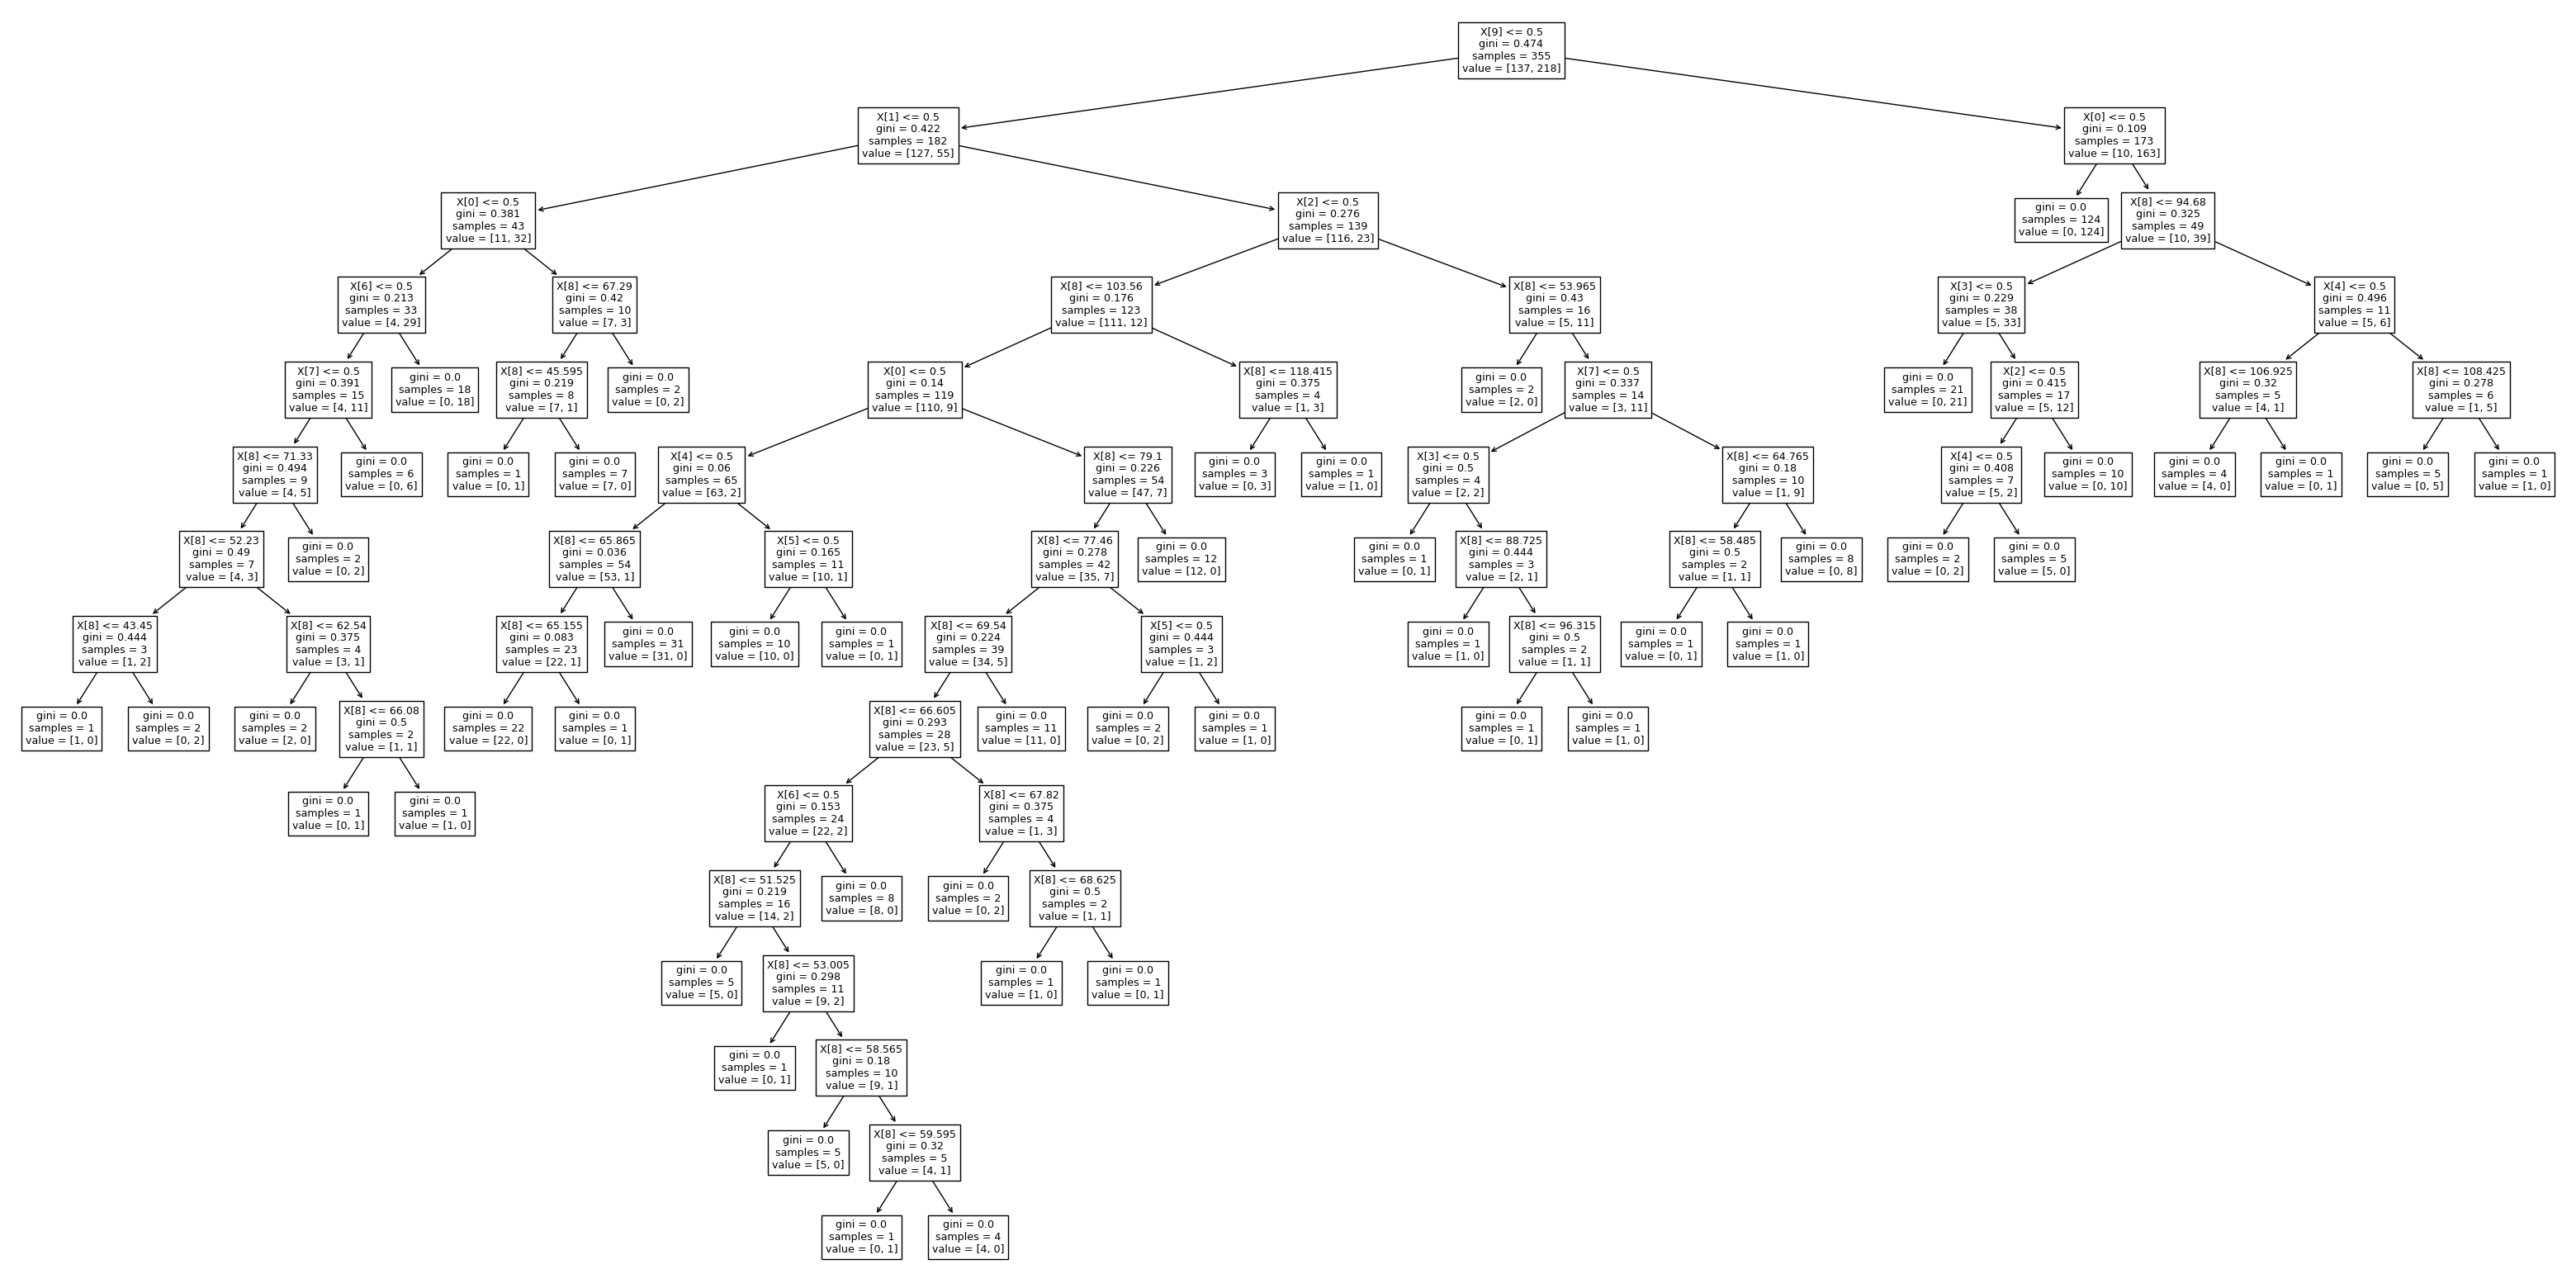

In [157]:
fix, ax = plot.subplots(figsize=(40,20))
tree.plot_tree(tree_clf)
plot.show()

 ['Alopecia_yes', 'Irritability_yes', 'Partial Paresis_yes', 'Polyphagia_yes', 'Sudden Weight Loss_yes', 'Visual Blurring_yes', 'Weakness_yes']

## Fairness
To get some measure of fairness, we need to establish **fairness in relation to what?**. Thus we have to define a set of features that we consider to be important for fairness purposes. These should roughly satisfy:
1. There's a societal issue related to treating groups of feature values differently. For instance: if race were to be used, it would be problematic if we made a predictor that was a lot better at finding diabetes in white individuals than it was at finding it in black individuals.
2. There's no clear / strong reason that this feature should impact the output. For instance, again using race: there should be no reason that diabetes is more prevalent in white individuals. This is not a strict requirement: in some cases we can accept that feature values correlated with the output should not be treated differently. As an example, it would be politically problematic (to say the least) if we evaluated likeliness of being guilty of a certain crime unevenly base on race.

From our original feature set, we can postulate that the following features should be considered for fairness:
* Race
* Gender
* GP

And potentially:
* Height
* Weight

As a happy accident, only one of these features made it into the main feature set we are examining: **Gender**. Note that this feature doesn't need to be in the actual feature set used as input to the model: there may still be imbalances in the classifier, for instance if there is some hidden correlation between the features used and gender.

So intuitively, we're seeking a classifier that is as good at identifying diabetes in women, as in men. Now, we need metrics that can assess this.

The first one is simple: rate of false negatives, and rate of false positives -- with a strong preference for rate of false negatives:
* Rate of false negatives is how many diabetes patients that aren't caught, and is important. It's a very real issue if more female diabetes patients go unnoticed, than do male.
* Rate of false positives is how many people are asked to see a doctor, and test negative for diabetes. It's a less serious issue if more females are asked to go to the doctor than men -- but if the difference is large, we might still consider it problematic.

We will now use the best model from each type of model: SVM, small MLP, large MLP, kNN and decision tree. Each will be evaluated for the metrics defined above.


## Privacy: Anonymization

We elect to use differential privacy to protect privacy in our use of the data. This gives a strong guarantee of privacy for individuals, and is robust to for instance linkage attacks.

Due to the nature of the data collection (the data have already been given to us), we use a centralized model of differential privacy.

### Helper functions:

In [158]:
# Anonymize a single row using differential privacy: default is flipping a fair coin,
# which gives ln(3)-differential privacy
def anonymize_row(row, theta=0.5):
    # Decide whether to change or not
    coin = np.random.choice([True, False], p=(theta, 1-theta))
    changed = False

    if coin != True: # generate responses randomly
        for idx, val in row.items():
            # generate single randomized entry
            new_val = np.random.choice([1, 0], p=(theta, 1-theta))
            row[idx] = new_val
        changed = True

    return row, changed

In [159]:
# Anonymize entire dataframe using differential privacy
def anonymize_df(df, verbose=False):
    res_df = df.copy()
    num_changed = 0

    for i, row in res_df.iterrows():
        # some issue causes the loop to go too far, so we break here
        if i == len(res_df):
            if verbose:
                print("num changed:", num_changed)
            break
        # anonymize current row
        new_row, changed = anonymize_row(row, theta=0.5)
        if changed:
            num_changed += 1

        # assign the generated row to the output DataFrame
        res_df.iloc[i] = new_row

    return res_df

In [179]:
# Given a classifier, feature selection, training and test data and some original metrics,
# make a differentially private data set and do prediction based on this,
# finally reporting the original versus current metrics
def anonymize_predict_report(feat_comb, df, data, clf_creator, orig_metrics, verbose=False):
    #X_train, X_test, y_train, y_test = data

    df_anonymized = anonymize_df(df, verbose=verbose)

    X_train, X_test, y_train, y_test = train_test_split(df_anonymized, labels_df, test_size=0.2, random_state=42)

    new_clf = clf_creator()
    new_clf.fit(X_train, np.ravel(y_train))

    y_pred= new_clf.predict(X_test)
    print(y_pred)

    new_metrics = calculate_metrics(y_test, y_pred)

    clf_type = clf_creator.__name__.split("_")[1]

    print("Original metrics for %s classifier:" % clf_type)
    print_metrics(orig_metrics)
    print()
    print("New metrics for %s classifier:" % clf_type)
    print_metrics(new_metrics)
    print("Using features: %s", feat_comb)


### SVM classifier:


In [180]:
svm_df = features_df[svm_comb]
anonymize_predict_report(svm_comb, svm_df, svm_data, create_SVM, svm_metrics, verbose=True)

num changed: 172
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Original metrics for SVM classifier:
Accuracy:  0.876
Precision: 0.877
Recall:    0.950
F1-score:  0.912
F2-score:  0.934

New metrics for SVM classifier:
Accuracy:  0.674
Precision: 0.674
Recall:    1.000
F1-score:  0.805
F2-score:  0.912
Using features: %s ['Gender_male', 'Irritability_yes', 'Urination_high']


### Simple MLP classifier:

In [181]:
ffsimple_df = features_df[ffsimple_comb]
anonymize_predict_report(ffsimple_comb, ffsimple_df, ffsimple_data, create_simple_MLP, ffsimple_metrics)

[1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
Original metrics for simple classifier:
Accuracy:  0.933
Precision: 0.922
Recall:    0.983
F1-score:  0.952
F2-score:  0.970

New metrics for simple classifier:
Accuracy:  0.663
Precision: 0.703
Recall:    0.867
F1-score:  0.776
F2-score:  0.828
Using features: %s ['Gender_male', 'Irritability_yes', 'Partial Paresis_yes', 'Sudden Weight Loss_yes', 'Urination_high']


C:\Users\espen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Large MLP classifier

In [182]:
fflarge_df = features_df[fflarge_comb]
anonymize_predict_report(fflarge_comb, fflarge_df, fflarge_data, create_large_MLP, fflarge_metrics)

[0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1
 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0]
Original metrics for large classifier:
Accuracy:  0.989
Precision: 1.000
Recall:    0.983
F1-score:  0.992
F2-score:  0.987

New metrics for large classifier:
Accuracy:  0.528
Precision: 0.661
Recall:    0.617
F1-score:  0.638
F2-score:  0.625
Using features: %s ['Alopecia_yes', 'Gender_male', 'Irritability_yes', 'Partial Paresis_yes', 'Polyphagia_yes', 'Sudden Weight Loss_yes', 'Visual Blurring_yes', 'Urination_high']


In [183]:
knn_df = features_df[knn_comb]
anonymize_predict_report(knn_comb, knn_df, knn_data, create_KNN, knn_metrics)

[0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1]
Original metrics for KNN classifier:
Accuracy:  0.876
Precision: 0.877
Recall:    0.950
F1-score:  0.912
F2-score:  0.934

New metrics for KNN classifier:
Accuracy:  0.697
Precision: 0.739
Recall:    0.850
F1-score:  0.791
F2-score:  0.825
Using features: %s ['Gender_male', 'Irritability_yes', 'Urination_high']


### Decision Tree classifier:

In [184]:
tree_df = features_df[tree_comb]
anonymize_predict_report(tree_comb, tree_df, tree_data, create_tree, tree_metrics)

[1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1
 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1]
Original metrics for tree classifier:
Accuracy:  0.910
Precision: 0.894
Recall:    0.983
F1-score:  0.937
F2-score:  0.964

New metrics for tree classifier:
Accuracy:  0.584
Precision: 0.695
Recall:    0.683
F1-score:  0.689
F2-score:  0.686
Using features: %s ['Alopecia_yes', 'Gender_male', 'Irritability_yes', 'Partial Paresis_yes', 'Polyphagia_yes', 'Sudden Weight Loss_yes', 'Visual Blurring_yes', 'Weakness_yes', 'Weight', 'Urination_high']
